## Problem Description

It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

In this database, we have 3 different outputs:

- No readmission;
- A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);
- A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient.

# Coding 

### 1. Import Libraries

In [1]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Read Data

In [2]:
df = pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 3. Data Analysis, Visualization and Cleaning

<b>Shape of the data ?</b>

In [4]:
print('The shape of the Dataset is :', df.shape)

The shape of the Dataset is : (101766, 50)


<b>Check the columns of the dataset?</b>

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

<b> Number of columns in the data?</b>

In [6]:
print('There are total', len(df.columns), 'columns in the dataset.')

There are total 50 columns in the dataset.


From the 50 columns 49 columns such as encounter_id, patient_nbr etc are the independent variables and the column name <b>"readmitted"</b> is the dependent variable and the label of the data. 

<b>Statistics of the Data ?</b>

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


<b> How many Null Values in Data? </b>

The data contains some null values, but null values are filled with "?". so we will look for '?' in each column for null values.

In [8]:
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


We can see that there are many null values in the columns like <b>"medical_specialty"</b> , <b>"race"</b> and <b>"payer_code"</b>. So we will have to fill these null values or drop the rows or columns with null values.  

We start analyzing columns sequentially and will drill down the data to look for insights. We will look for Number of Patients in the data. As we know we can check from the <b>"patient_nbr"</b> column that how many unique patients in the data.

In [9]:
print('There are', len(df['patient_nbr'].unique()), 'unique patients in the data.')

There are 71518 unique patients in the data.


In [10]:
print('There are', len(df['encounter_id'].unique()), 'unique encounters in the data.')

There are 101766 unique encounters in the data.


- Everytime the patient visits the hospital, it is called as <b>encounter</b>. 
- So we have multiple encounters per patient. 


So we will take the problem as simple classification problem and didnt deal it with like a <b>Time Series</b> problem as we dont have much encounters per patient in the data.

<b>Encounter per patient?</b>

In [11]:
# If we divide total patient with total encounter, we can get the average encounters per patient.
len(df['encounter_id'].unique())/len(df['patient_nbr'].unique())

1.4229424760200229

- So we have <b>1.4 encounters </b> per patient and majority of the patients will have only 1 encounter in the data.

<b>Lets check this with the statistics.</b>


In [12]:
df_encounters_check = df.groupby(['patient_nbr']).agg(encounters = ('encounter_id', 'count')).reset_index().sort_values(['encounters'], ascending = False)

In [13]:
df_encounters_check[df_encounters_check['encounters']==1]

,patient_nbr,encounters
67782,113027103,1
47538,76294341,1
69175,128362955,1
47108,74831733,1
68950,124906928,1
...,...,...
26948,34935156,1
26949,34935795,1
26950,34935804,1
26951,34937658,1


- From the 71518 patients, 54745 patients have only 1 encounter in the data.
- Remaining patients have more than 1 encounter in the data. 
- So we concluded that we will only take data as simple data, not a Time Series Data. 

<b>Lets analyze the label column ?</b>

- First of All, Lets check the Distribution of Label column. 

In [14]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

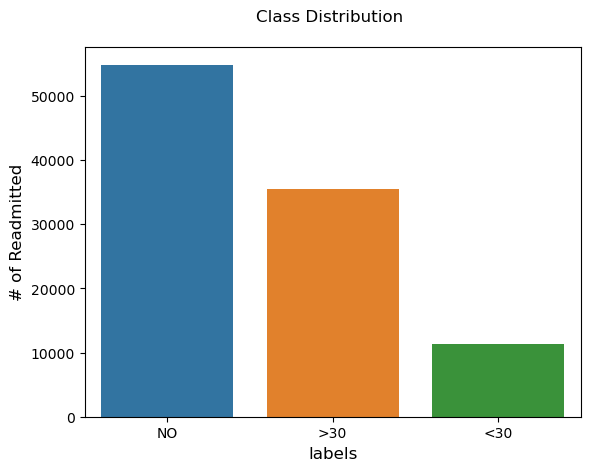

In [15]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

- As Approximately 50% of the data belongs to the  "NO" class, and other classes have less labels.
- It will create class imbalance problem. So we will take this problem as 2 class problem.
- We will only try to predict if the patinet will readmitted or Not, We will skip the part of less than 30 days or greater than 30 days.

<b> Create 2 Class Label : </b> Created Another label to map <30 and >30 to 1 class for better Analysis and Classification.

In [16]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [17]:
# Created another column and take it as 2 class problem, Label the <30 and >30 as YES and Other "N0" as No.

def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
df['readmitted_2'] =df['readmitted'].apply(check_label) 

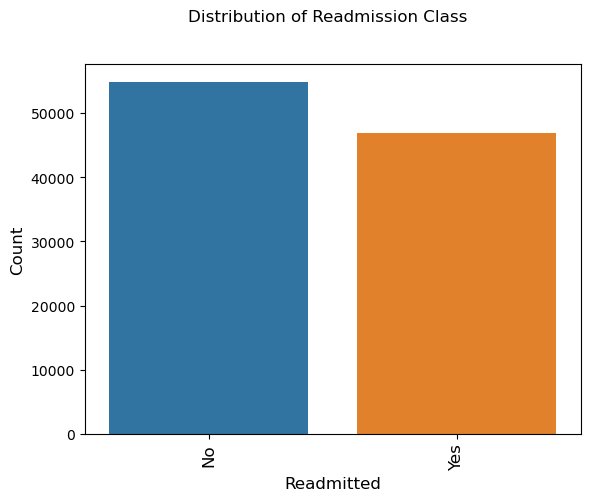

In [18]:
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()

<b> Race Column</b>

Race featrure defines the race of the patient.
According to Documentaiton the values for race can be: 

- Caucasian 
- Asian
- African American  
- Hispanic
- other

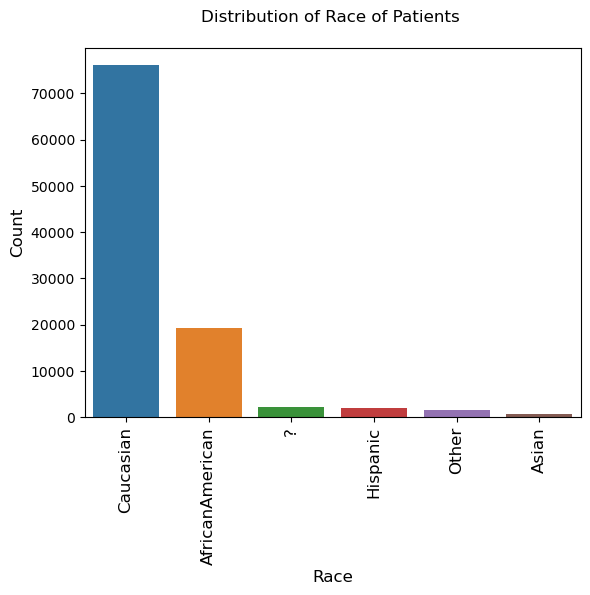

In [19]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

- The majority of the people are Caucasian, which are the people with european ancestry.

- There are "?" in the data which means the race contains the Null values.
- We will be needing to remove this from the data or we can also assign this with "Other" category.

In [20]:
df.loc[df['race'] == '?', 'race'] = 'Other'

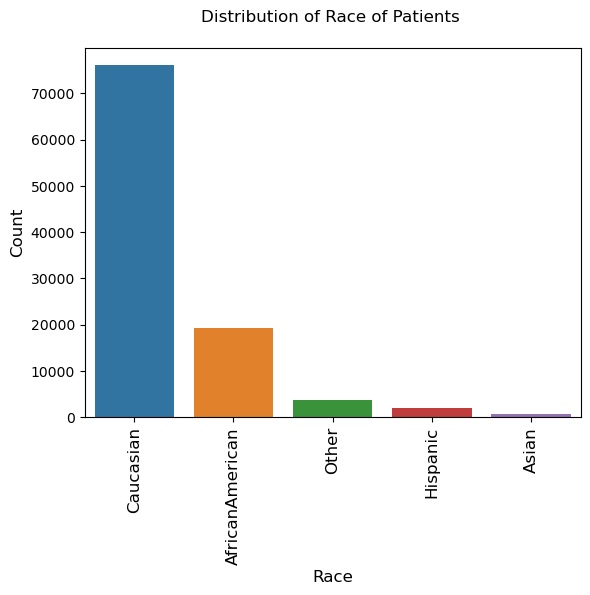

In [21]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

We replaced the Race containing value '?' with Other!

<b> What is the Gender Distribution in Data?</b>

According to Documentation, The values can be,

- male 
- female  
- unknown/invalid

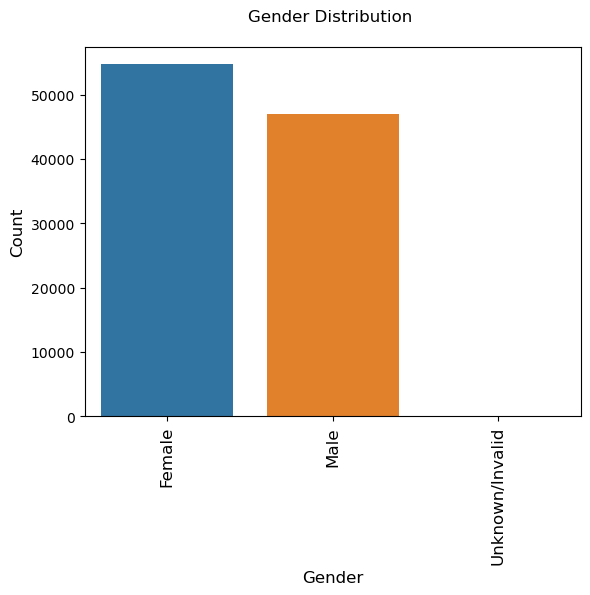

In [22]:
ax = sns.countplot(x='gender',   data= df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender Distribution \n', size = 12)
plt.show()

- We can see in the above figure that there are More than 50,000 Males in the data.
- Females are close to 48,000.
- There are some people whose gender is unknow, we can drop these rows as they are very few.

In [23]:
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

- There are only 3 Encounter for which we dont know the gender, It may create distribution error in the data. 
- So it is better to drop these rows from the data


In [24]:
df[df['gender']!='Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,Yes
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,No
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,No
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,No


In [25]:
# Drop the "Unknown/Invalid" gender of the data.
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)

In [26]:
df.reset_index(inplace = True, drop = True)

In [27]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No


<b>Relationship of Gender and Readmitted Overall</b>

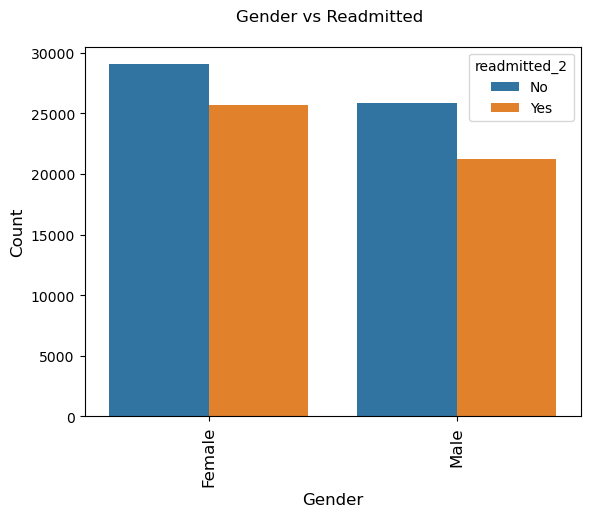

In [28]:
ax = sns.countplot(x="gender", hue="readmitted_2", data=df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender vs Readmitted \n', size = 12)
plt.show()

<b>What Age of People are there in data?</b>

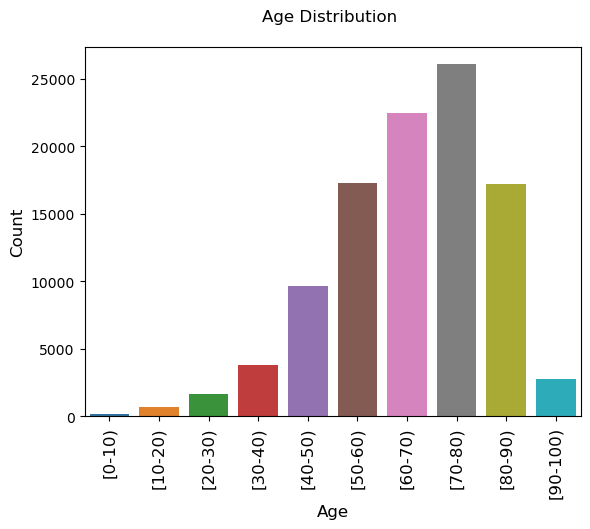

In [29]:
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age Distribution \n', size = 12)
plt.show()

- As per the Literature, The problem of Readmission is common in Older People. 

<b>RelationShip Between and Age and Readmission ? </b>

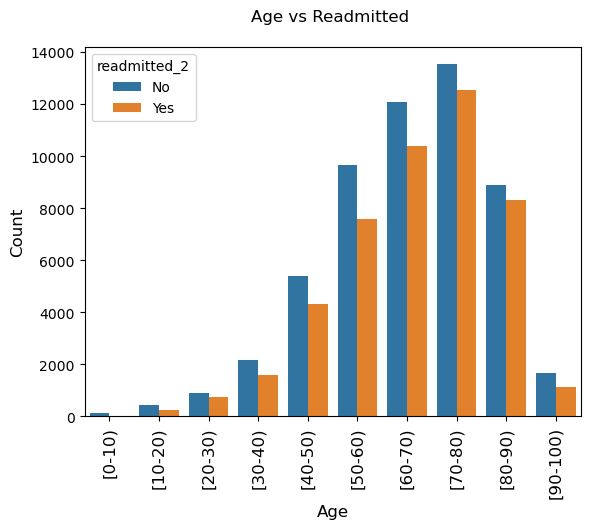

In [30]:
ax = sns.countplot(x="age", hue="readmitted_2", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age vs Readmitted \n', size = 12)
plt.show()

- As we mentioned above, The relationship of older Patients and Readmission is Strong as Mostly Older Patients are at high risk of Readmission.

- And you can also see from the data the Mostly Older Patient are Readmitted, and younger people not tend to readmit. 

<b> Lets Analyze Weight of the Patient ?</b>

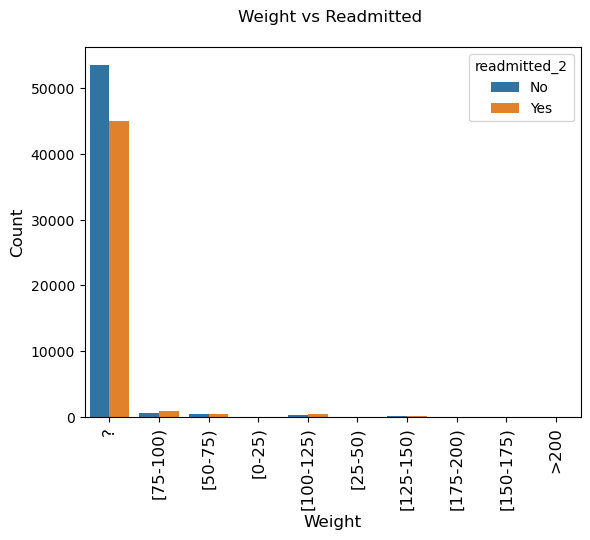

In [31]:
ax = sns.countplot(x="weight", hue="readmitted_2", data=df)
plt.xlabel('Weight', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Weight vs Readmitted \n', size = 12)
plt.show()

- From value Counts We can see that the from around 101000 records, 98569 records dont have Weight Value. 
- So, We will drop this column. 
- If we will try to fill this column it can disturb the distribution of the data.

In [32]:
# Lets drop this column. 
df.drop(columns = ['weight'], inplace = True)

<b>Understanding of admission_type_id column.</b>

As per the documentation, Integer identifier corresponding to 9 distinct values, for example:
- emergency
- urgent
- elective
- newborn
- not available

This represents the Type of Admission of the Patient, Which means in which department patient if admitted to at the time of encounter. 

As we dont have specific Id Defined even in the Documentation, we cannot map these value with Type for better undetstanding. 
We will only see if which ID have most Encounters.

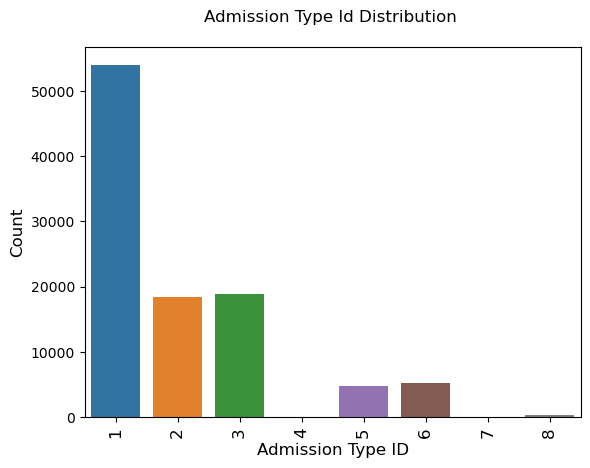

In [33]:
ax = sns.countplot(x='admission_type_id',   data= df)
plt.xlabel('Admission Type ID', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Admission Type Id Distribution \n', size = 12)
plt.show()

We can see in the above graph, The Id 1 have most of the encounters. From the literature review i assumed that the value should mean as Inpatient Encounter. Because mostly the Patients Admitted to the Inpatiet Department Readmitted after some Procedure. 

<b>What is the Discharge Disposition ?</b>

AS per the Documentation, Integer identifier corresponding to 29 distinct values, for example:
- discharged to home
- expired
- not available 

As per Literature, The Discharge Disposition means the facility to which patinet is discharged to. Patient can discharge to Home Health, etc. 

In [34]:
len(df['discharge_disposition_id'].unique())

26

There are 26 Discharge Disposition's in the data and we also dont have mapping for it.

<b>What is Admission Source ID? </b>


As per the Literature, Integer identifier corresponding to 21 distinct values, for example:
- physician referral,
- emergency room,  
- transfer from a hospital

Admission Source means, from which source the patient came? The Patient can come from Physician Referral and other Sources.

In [35]:
df['admission_source_id'].unique()  

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [36]:
print('There are', len(df['admission_source_id'].unique()), 'unique Admission Sources from which patient can be admitted.')

There are 17 unique Admission Sources from which patient can be admitted.


<b>What is meaning of time_in_hospital? </b>


As per Literaure, it is Integer number of days between admission and discharge.

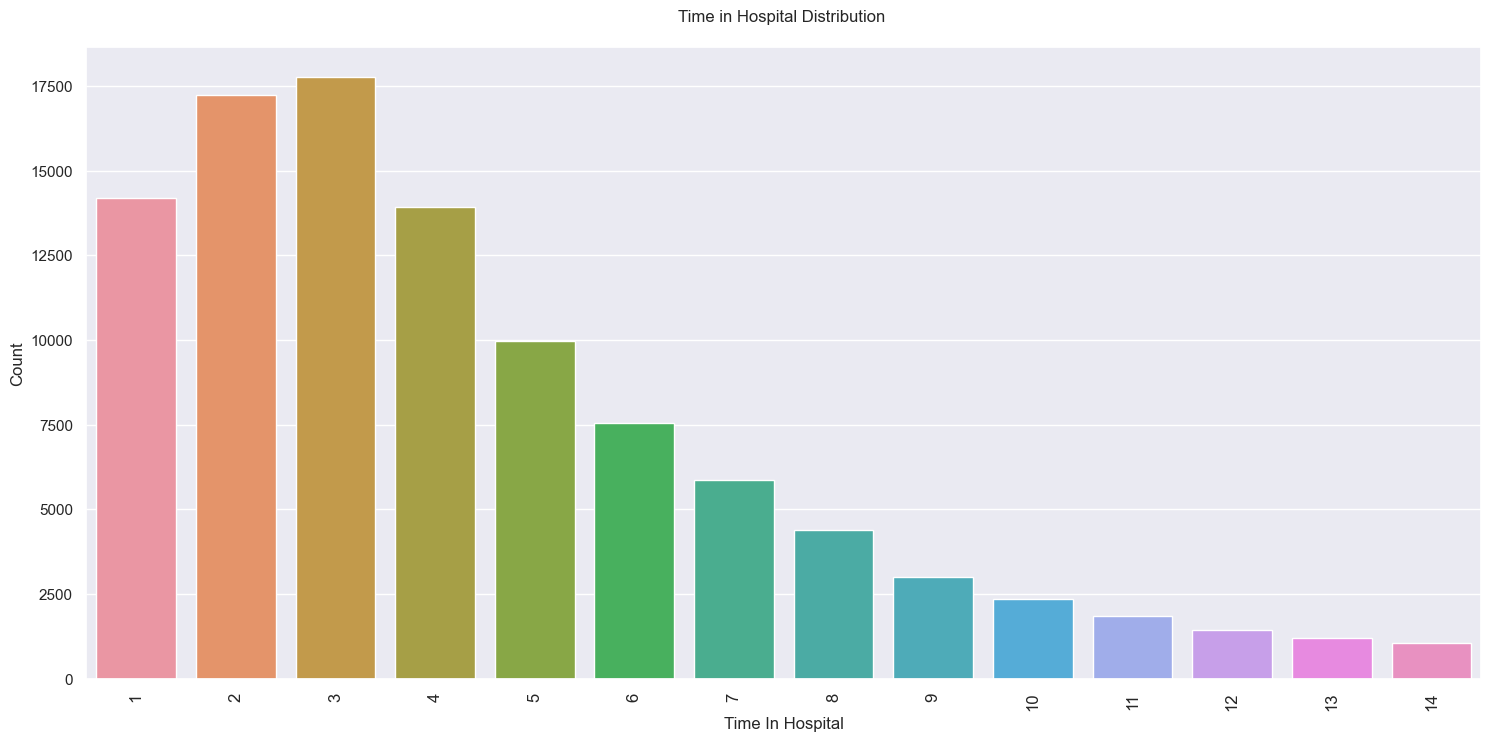

In [37]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',   data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Time in Hospital Distribution \n', size = 12)
plt.show()

In [38]:
df['time_in_hospital'].mean()

4.396018199149003

From the Graph and Mean of the Time in Hospital, We found that the majority of the people stays in hospital 2-4 Days.

<b>What is the Relation of Stay in Hospital and Readmission? </b>

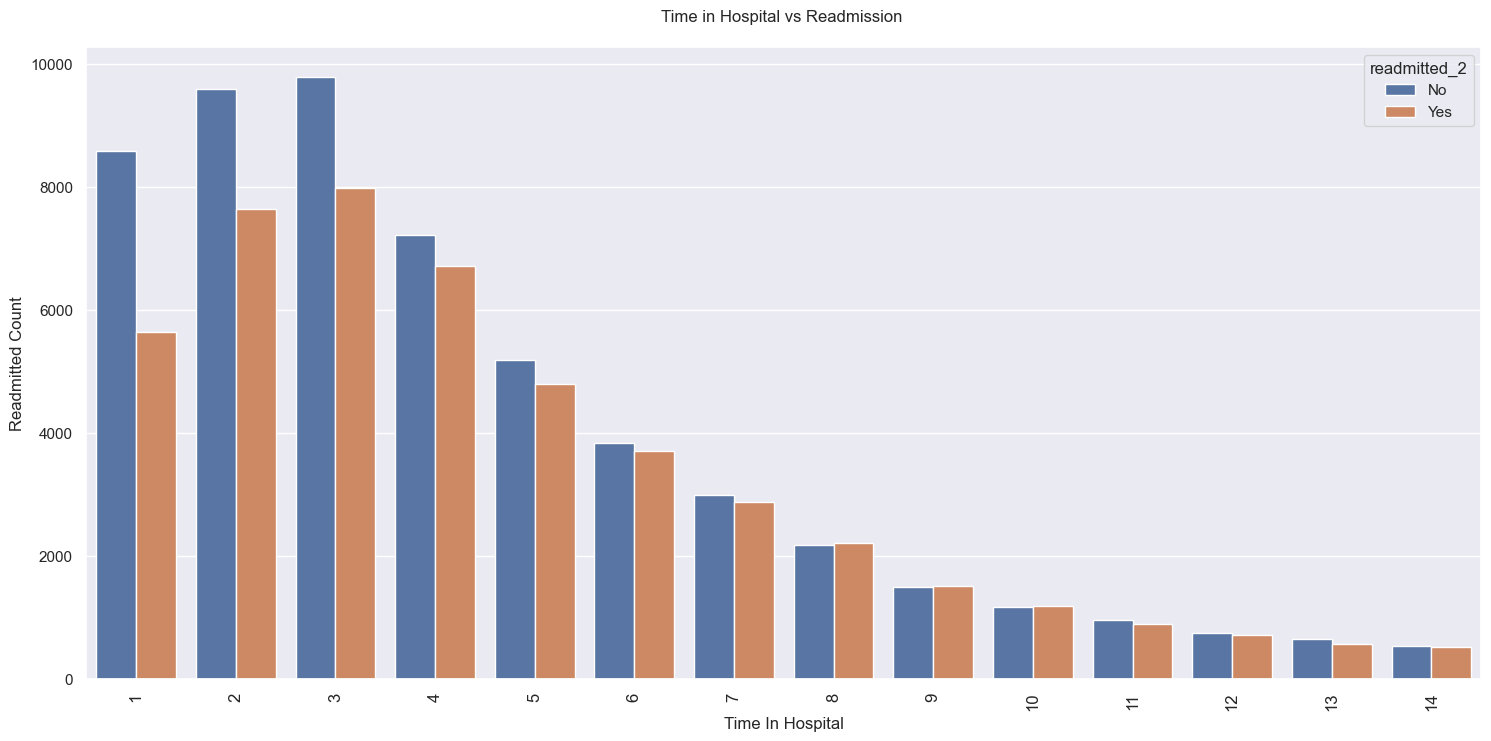

In [39]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  hue= 'readmitted_2',  data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Time in Hospital vs Readmission \n', size = 12)
plt.show()

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


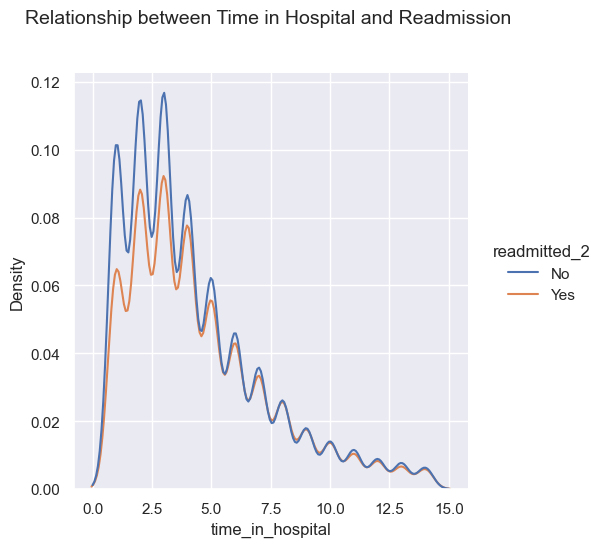

In [40]:
sns.set(rc={'figure.figsize':(18, 8.2)})
sns.displot(df, x="time_in_hospital", hue = 'readmitted_2', kind="kde")
plt.title('Relationship between Time in Hospital and Readmission \n\n', size  = 14)
plt.show()

Normal Time in Hospital for Not Readmitted and Readmitted is the same. This means that this parameter will not add value In our model.

<b> What is payer Code ?</b>

From the Literature, Integer identifier corresponding to 23 distinct values, for example:

- Blue Cross\BlueShield 
- Medicare,
- self-pay

This represent the payer of bill at the hospital. 

In [41]:
df['payer_code'].value_counts()

payer_code
?     40255
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

We can see that there are <b>40256 </b> Empty values here, We will remove this column from the data. 


In [42]:
df.drop(columns = ['payer_code'], inplace = True)

<b> What is medical Speciality?</b>

Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct
values, for example:

- cardiology
- internal medicine 
- family\general practice
- surgeon

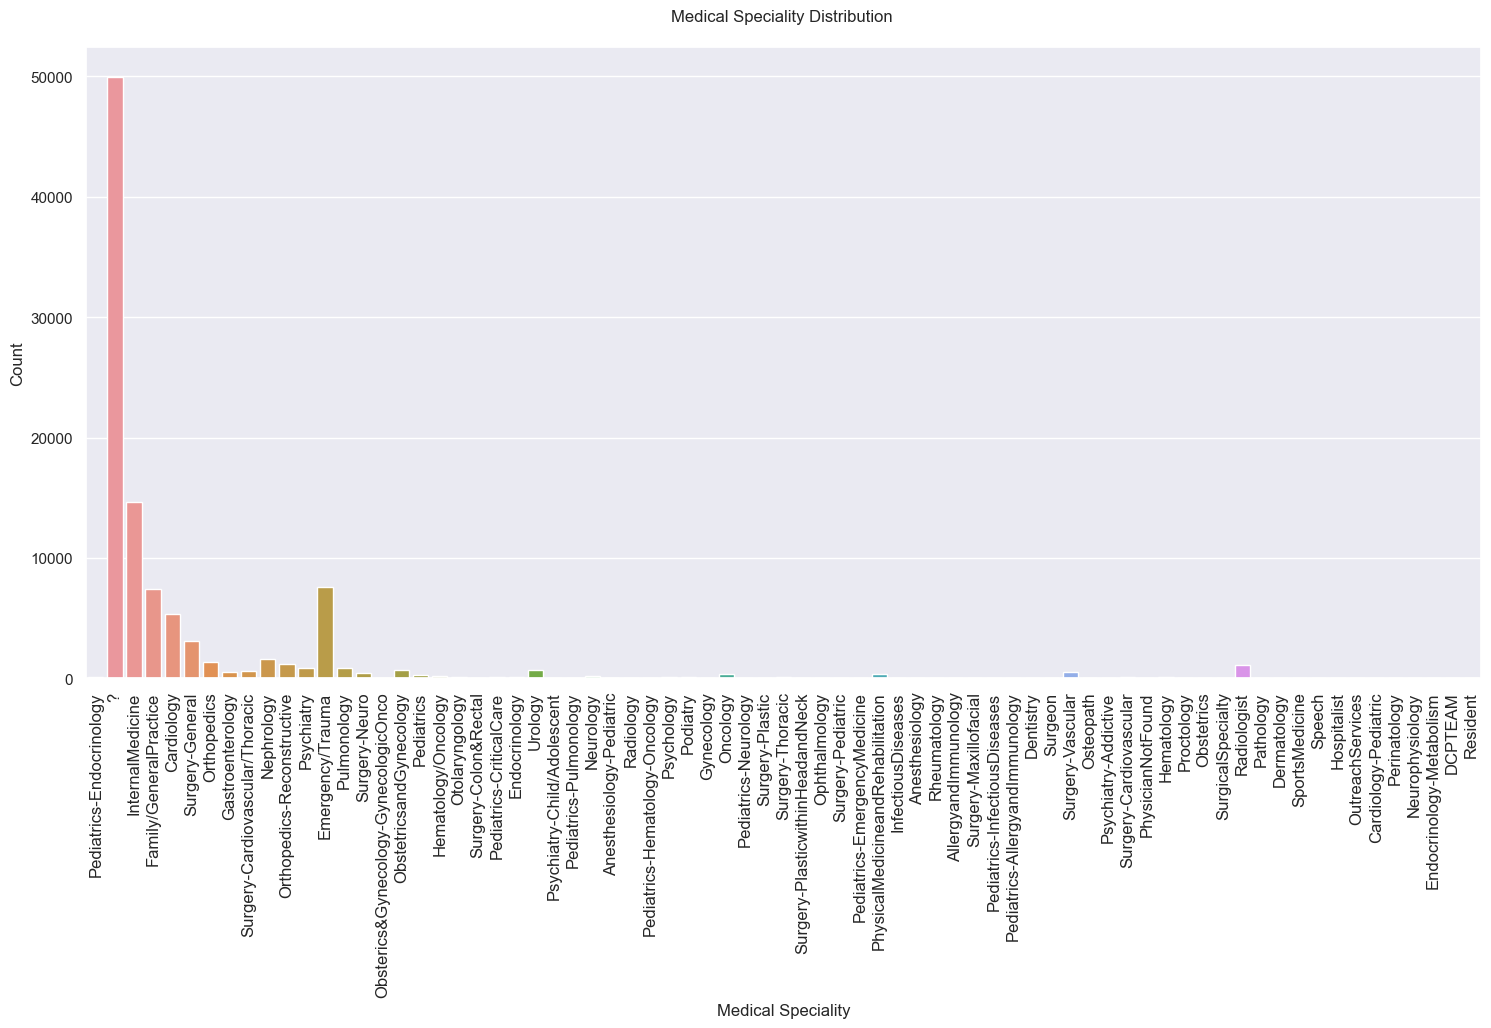

In [43]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='medical_specialty',   data= df)
plt.xlabel('Medical Speciality', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Medical Speciality Distribution \n', size = 12)
plt.show()

- By looking at the graph we can see that there are also many missing values in the data. We will remove this column.
- As managing this colum with so many missing values will be not easy. 

In [44]:
df.drop(columns =['medical_specialty'], inplace = True)

<b>What is num_lab_procedures ? </b>

Number of lab tests performed during the encounter


/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


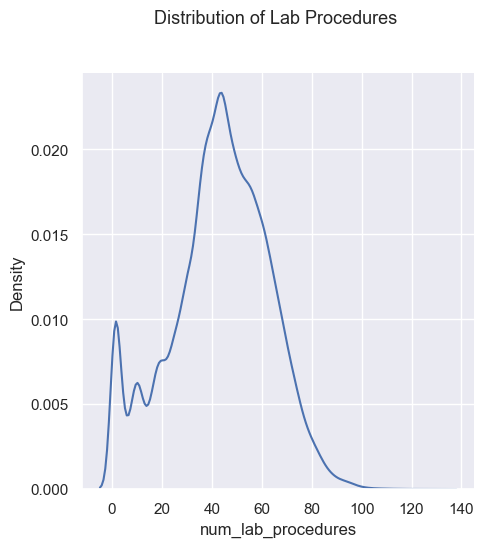

In [45]:
sns.displot(df, x="num_lab_procedures", kind="kde")
plt.title('Distribution of Lab Procedures \n\n', size = 13)
plt.show()

-  As we can see that from the distribution plot. That the majority of the Patients have around 30 to 50 Labs Procedures. Lets look at it with respect to class.   

<b>Trend of Lab Procedures with Readmission ?</b>

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


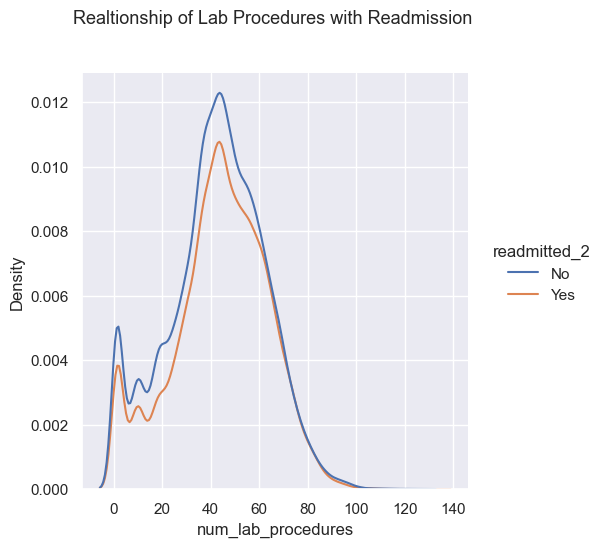

In [46]:
sns.displot(df, x="num_lab_procedures", hue= 'readmitted_2', kind="kde")
plt.title('Realtionship of Lab Procedures with Readmission \n\n', size = 13)
plt.show()

- The Distribution of Readmitted and Not Readmitted have the same trend.
- The number of labs procedures will not play a vital role in creating contrastive behaviour between Readmitted and Not Readmitted.

<b>What is the relation of Number of Procedures and Readmission? </b>

Number of procedures (other than lab tests) performed during the encounter

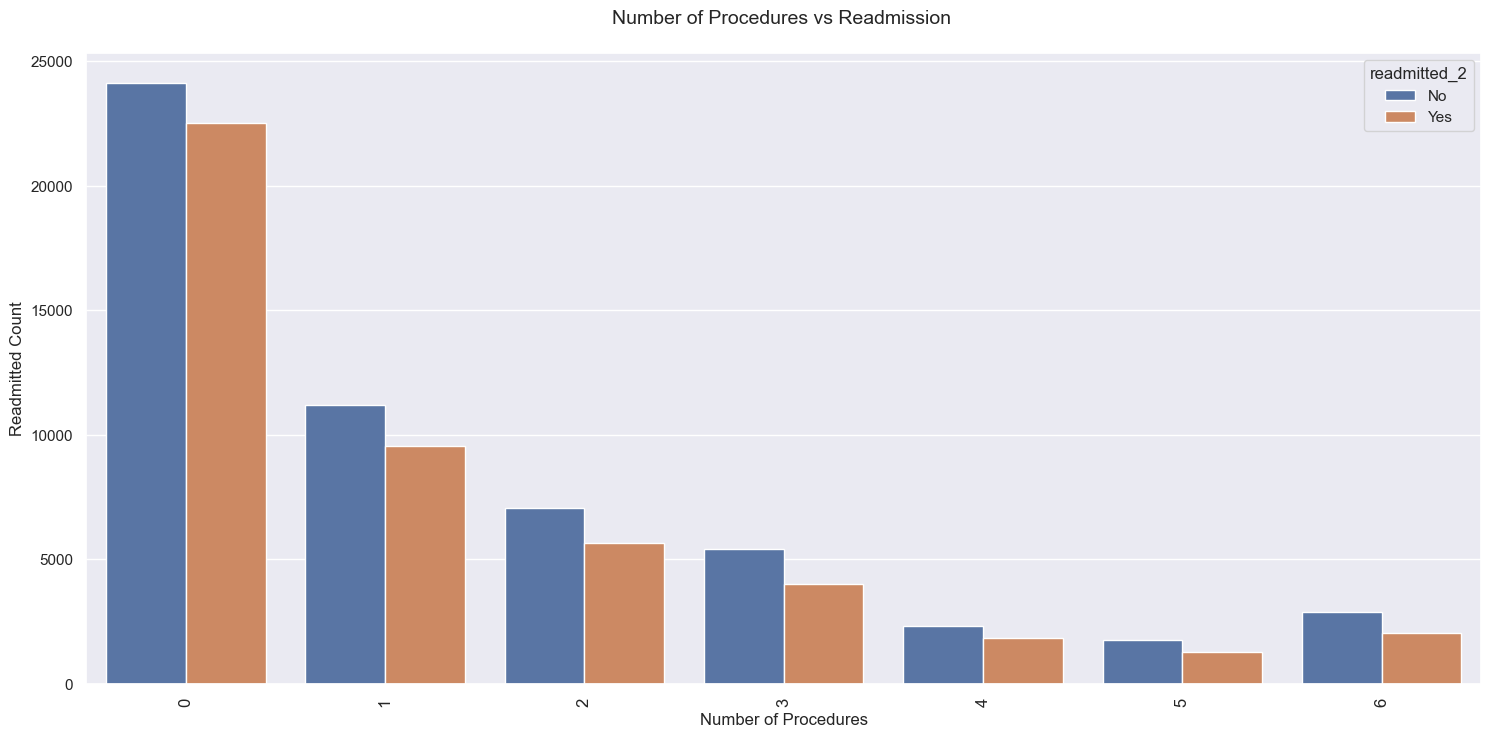

In [47]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='num_procedures',  hue= 'readmitted_2',  data= df)
plt.xlabel('Number of Procedures', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Number of Procedures vs Readmission \n', size = 14)
plt.show()

- Number of Procedures is also not giving some vital signs of readmission with increase in procedure. 
- Majority of patients have 0 procedures which are can be Readmitted and not Readmitted

<b>What is the contribution of num_medications in the data? </b>

Number of distinct generic names administered during the encounter

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


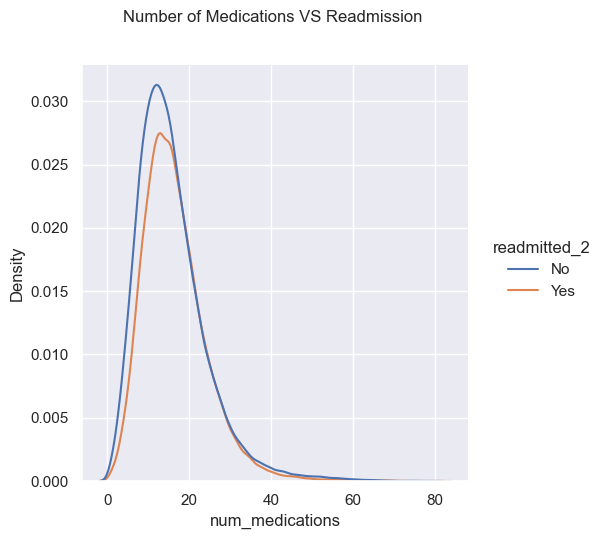

In [48]:
sns.displot(df, x="num_medications", hue= 'readmitted_2', kind="kde")
plt.title('Number of Medications VS Readmission \n\n')
plt.show()

- Again, By looking at the Distribution of Number of Medications a patient take, the trend look same for both classes.
- It means this also will not add variance in data.

<b>What is the trend of Outpatient Visits W.R.T to Readmission? </b>

Number of outpatient visits of the patient in the year preceding the encounter

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


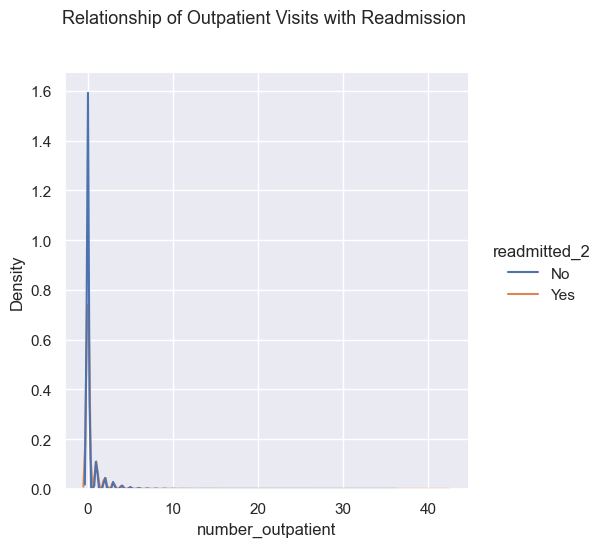

In [49]:
sns.displot(df, x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relationship of Outpatient Visits with Readmission \n\n', size = 13)
plt.show()

- The Distribution of Number of Outpatient is very skewed. We cannot understand the trend from here.
- As the majority of the patinet have 0 inpatient visits. 
- We will look into deeply, We will drill down the data and look for data in detail.

<b> First of all look at Outpatient Visits below 5. </b> 

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


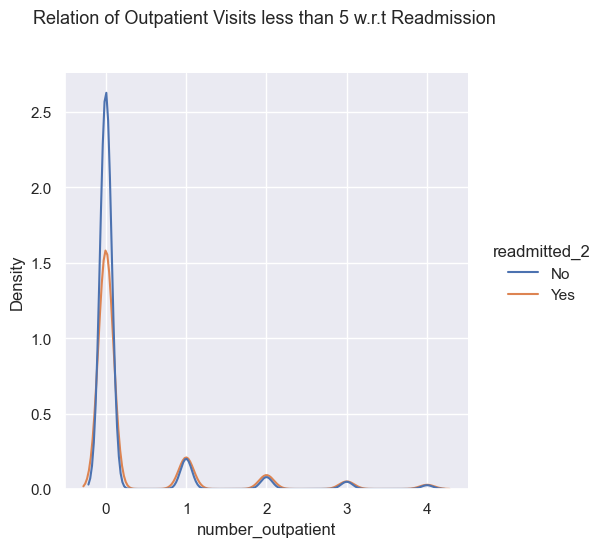

In [50]:
sns.displot(df.loc[df['number_outpatient']<5], x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relation of Outpatient Visits less than 5 w.r.t Readmission \n\n', size = 13)
plt.show()

We Identfied that the Patients with Outpatient Visits at 0, Normally not Readmitted. 

<b> First of all look at Outpatient Visits above 5. </b> 

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


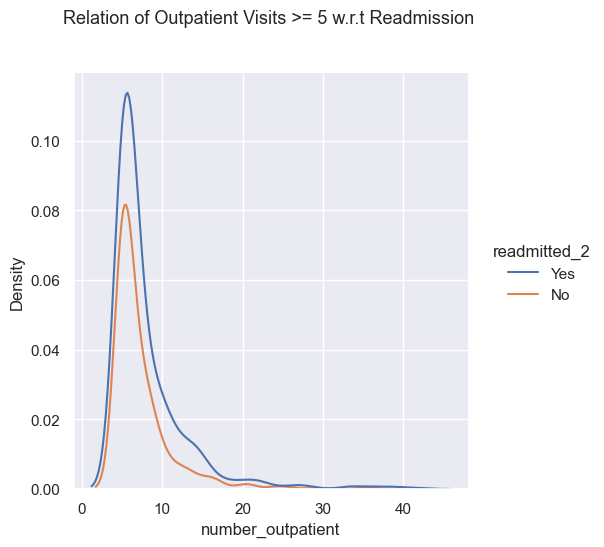

In [51]:
sns.displot(df.loc[df['number_outpatient']>=5], x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relation of Outpatient Visits >= 5 w.r.t Readmission \n\n', size = 13)
plt.show()

- On the Data with Outpatient Visits greater than equal to 5, we most likely to see that more people readmitted then not readmitted.
- We can conclude that this feature on some range will give us more important rules.

<b> What is the trend of Number of Emergency Visits ?</b>

Number of emergency visits of the patient in the year preceding the encounter

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


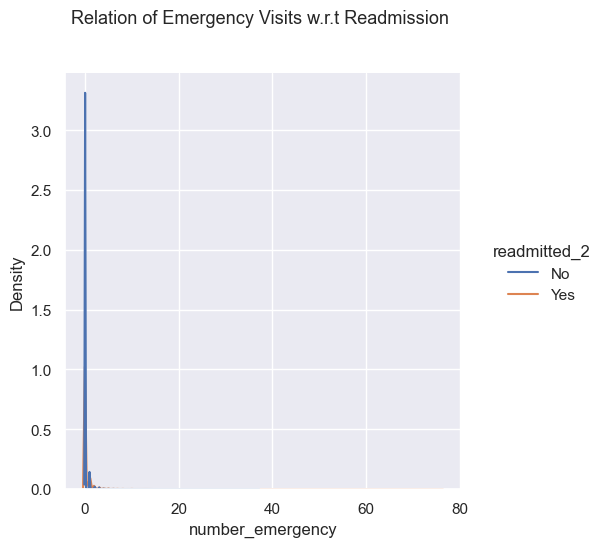

In [52]:
sns.displot(df, x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relation of Emergency Visits w.r.t Readmission \n\n', size = 13)
plt.show()

- We can see that the distribution of Emergnecy Visits very Skewed.
- Majority of the Patients have 0 Emergency `Visits. 
- We will slice the data and look for trend in detail.

<b> What is relation when we look at Emergency Visits less than 5 ? <b>

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


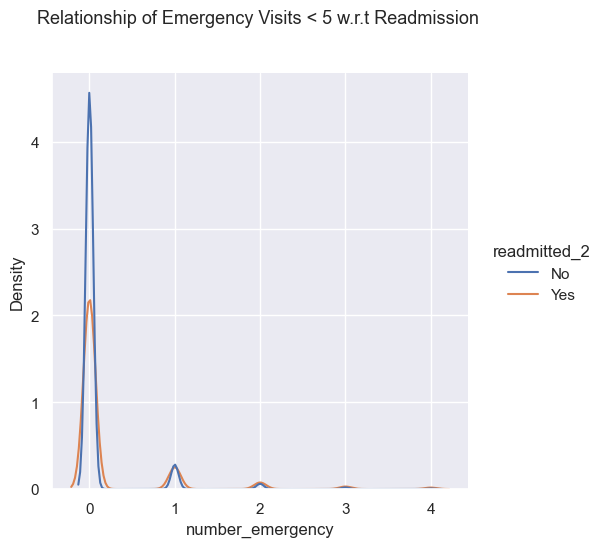

In [53]:
sns.displot(df.loc[df['number_emergency']<5], x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits < 5 w.r.t Readmission \n\n', size = 13)
plt.show()

- When the value is at 0 the number of Not Readmitted are higher than the Readmitted Patients. 
- Now lets look at the patients with readmission greater than equal to 5.

<b> What is relation when we look at Emergency Visits greater than 5 ? <b>

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


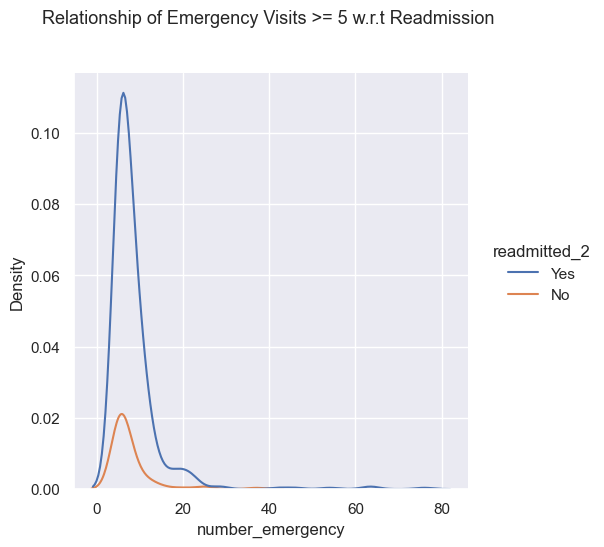

In [54]:
sns.displot(df.loc[df['number_emergency']>=5], x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits >= 5 w.r.t Readmission \n\n', size = 13)
plt.show()

- We can see that The majority of the Encouters have Number of Readmission Visits nea 10 and they are Readmitted to hospital.
- We can conclude that, if the Numer of emergency Visits Increased the Patient Most likely to readmit to the hospital.

<b>What is the pattern of Number of Inpatient Visits ? </b> 

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


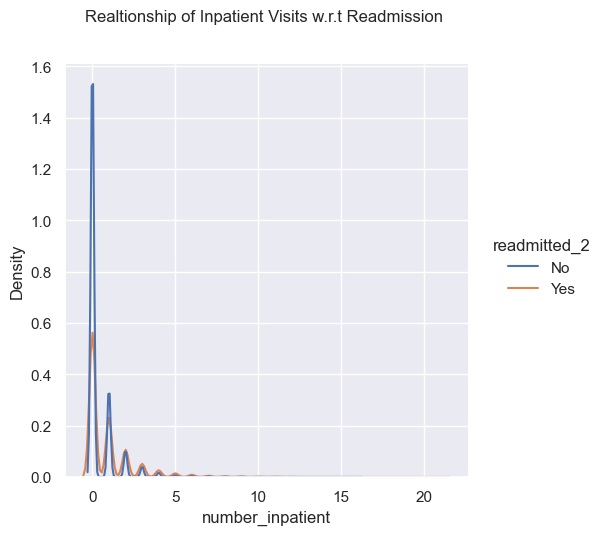

In [55]:
sns.displot(df, x="number_inpatient", hue= 'readmitted_2', kind='kde')
plt.title('Realtionship of Inpatient Visits w.r.t Readmission \n\n')
plt.show()

- We can see from above graph, the Inpatinet Readmission also lies at 0 for majority of Patients. 
- Now we drill down Number of Inpatient for better undetstanding.

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


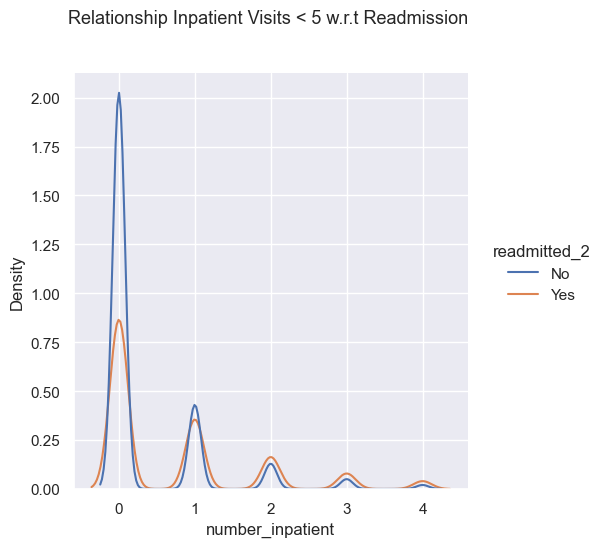

In [56]:
sns.displot(df.loc[df['number_inpatient']<5], x="number_inpatient", hue= 'readmitted_2', kind='kde')
plt.title('Relationship Inpatient Visits < 5 w.r.t Readmission \n\n', size = 13)
plt.show()

- From above graph, we see that if the patient comes in Inpatient Facility from 0-5 Times it will not readmitted.
- Also the majority of patients have 0 Inpatient Encounters.


/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


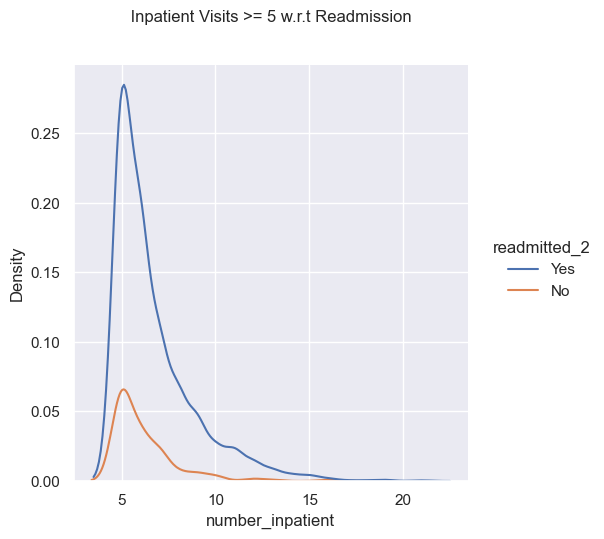

In [57]:
sns.displot(df.loc[df['number_inpatient']>=5], x="number_inpatient", hue= 'readmitted_2', kind='kde')
plt.title(' Inpatient Visits >= 5 w.r.t Readmission \n\n')
plt.show()

Now, if we look at the data for Inpatinet Visits greater than equal to 5, the patients most likeyly to Readmit to the hospital and it will become the deciding criteria for the model.

<b>What are Diag_1, Diag_2 and Diag_3. ?</b>

- There are three column which contains the diagnosis code for the Encounter. 
- Each time the patient admits to the hospital, A diagnosis code is assign with it.
- Which means on which problem the patient comes to the hospital.

- <b>Diagnosis 1 </b> :Nominal The primary diagnosis (coded as first three digits of ICD9); 848 distinct values 0%
- <b>Diagnosis 2 </b> :Nominal Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values 0%
- <b>Diagnosis 3 </b> :Nominal Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct
values

As per the Documentation, they are the ICD - 9 Coded Diagnosis Codes, Each code represents some Disease.
- The diag_1 is the Primary Diagnosis of the Patient, which means the patient is admitted to the hospital on this diagnosis.
- The diag_2 is the Secondary Diagnosis, According to CMS Documentation  "Secondary diagnoses are “conditions that coexist at the time of admission, that develop subsequently, or that affect the treatment received and/or length of stay. These diagnoses are vital to documentation and have the potential to impact a patient's severity of illness and risk of mortality"
- The diag_2 is the Additional Secondary Diagnosis.

In [58]:
len(df['diag_1'].unique()), len(df['diag_2'].unique()), len(df['diag_3'].unique())

(717, 749, 790)

<b> As the unique values are too much. We can analyze the Top Diagnosis in Each Class!</b>

In [59]:
df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()

diag_1
428    4057
414    2720
786    1709
486    1683
410    1438
       ... 
838       1
883       1
734       1
378       1
336       1
Name: count, Length: 614, dtype: int64

<b>Top 20 Diagnosis in the Readmitted = YES </b>

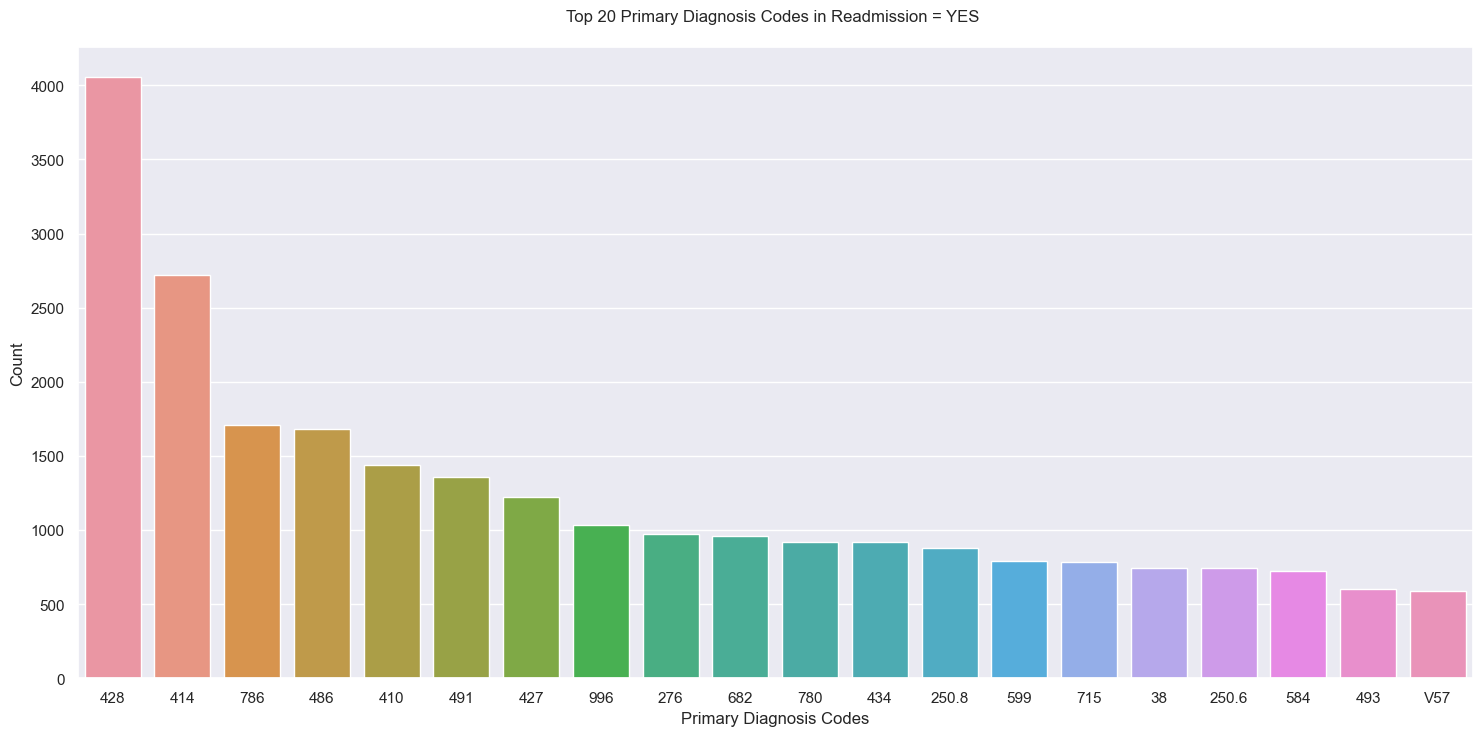

In [60]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = YES \n', size = 12)
plt.show()

The Top Diagnosis Codes are 428, 414 and 786 in the Readmitted Patients.
If we look at the ICD-9 Dictionary we will know that,
- 428 = Congestive heart failure
- 414 = Ischemic heart disease
- 786 = Symptoms involving respiratory system and other chest symptoms
- 486 = Pneumonia, organism unspecified 

So Patients with Heart Disease and Chest Disease are more likely to readmit to the hospital.

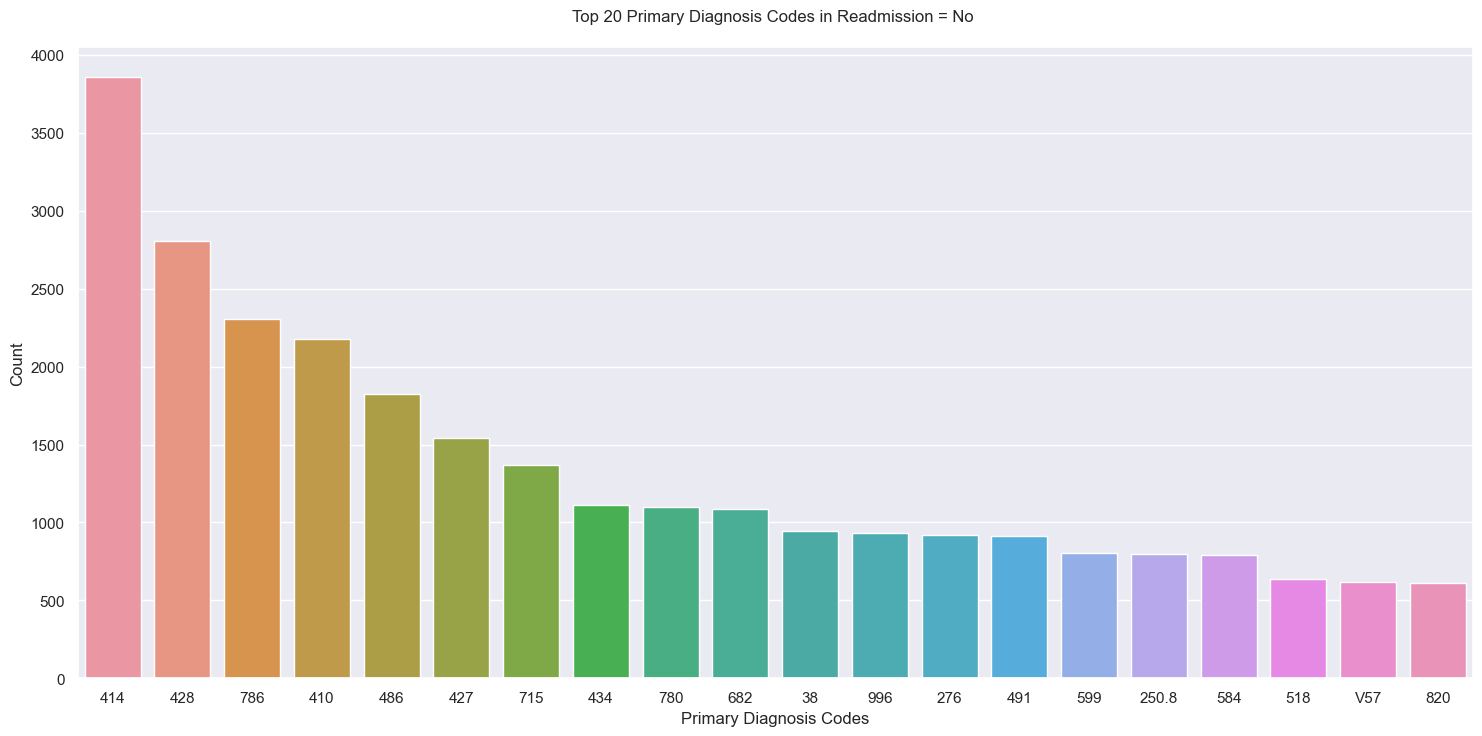

In [61]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'No']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'No']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = No \n', size = 12)
plt.show()

We can see from graph, Chest and Heart Diseases are also common in Patients who didnt Admitted.

<b>Lets Analyze Number of Diagnosis Column </b>

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


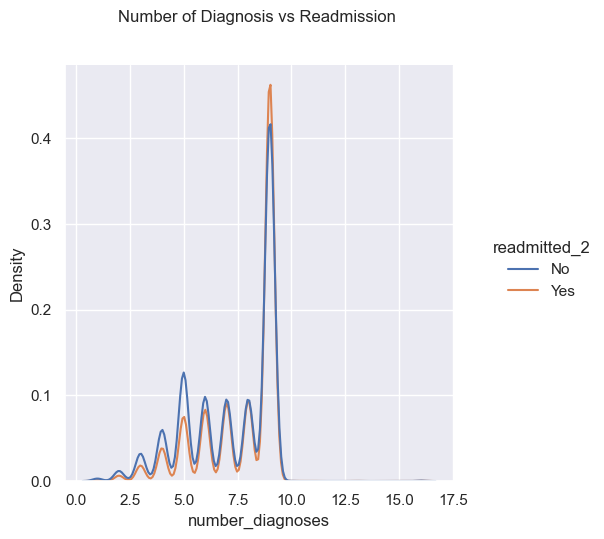

In [62]:
sns.displot(df, x="number_diagnoses", hue= 'readmitted_2', kind='kde')
plt.title('Number of Diagnosis vs Readmission \n\n')
plt.show()

- From Above plot we can see that, there is no clear difference in people Readmitted and Not Readmitted.
- There is some minor difference, which is at where Diagnosis between 8-10, The patient more likely to readmit. 
- As the pattern for more than 10 diagnosis is hidden we will look it in detail.


/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


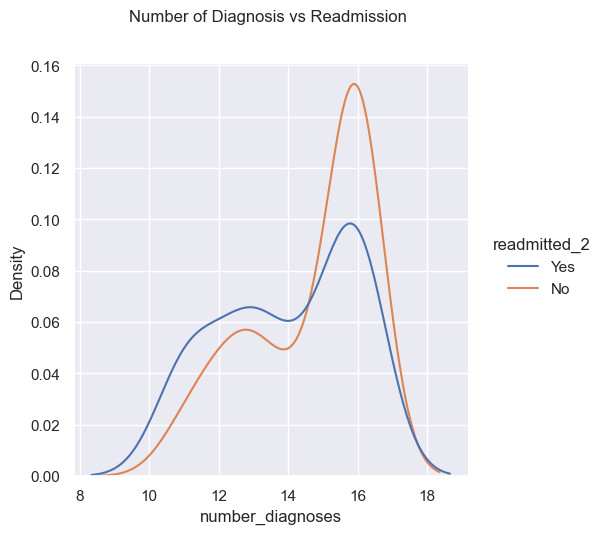

In [63]:
sns.displot(df[df['number_diagnoses']>10], x="number_diagnoses", hue= 'readmitted_2', kind='kde')
plt.title('Number of Diagnosis vs Readmission \n\n')
plt.show()

- The trend is same and have approximately same pattern. 

<b> What is the behaviour of max_glu_serum ?</b>

Indicates the range of the result or if the test was not taken.
Values:
- “>200,”
- “>300,”
- “normal,”
- “none” if not measured

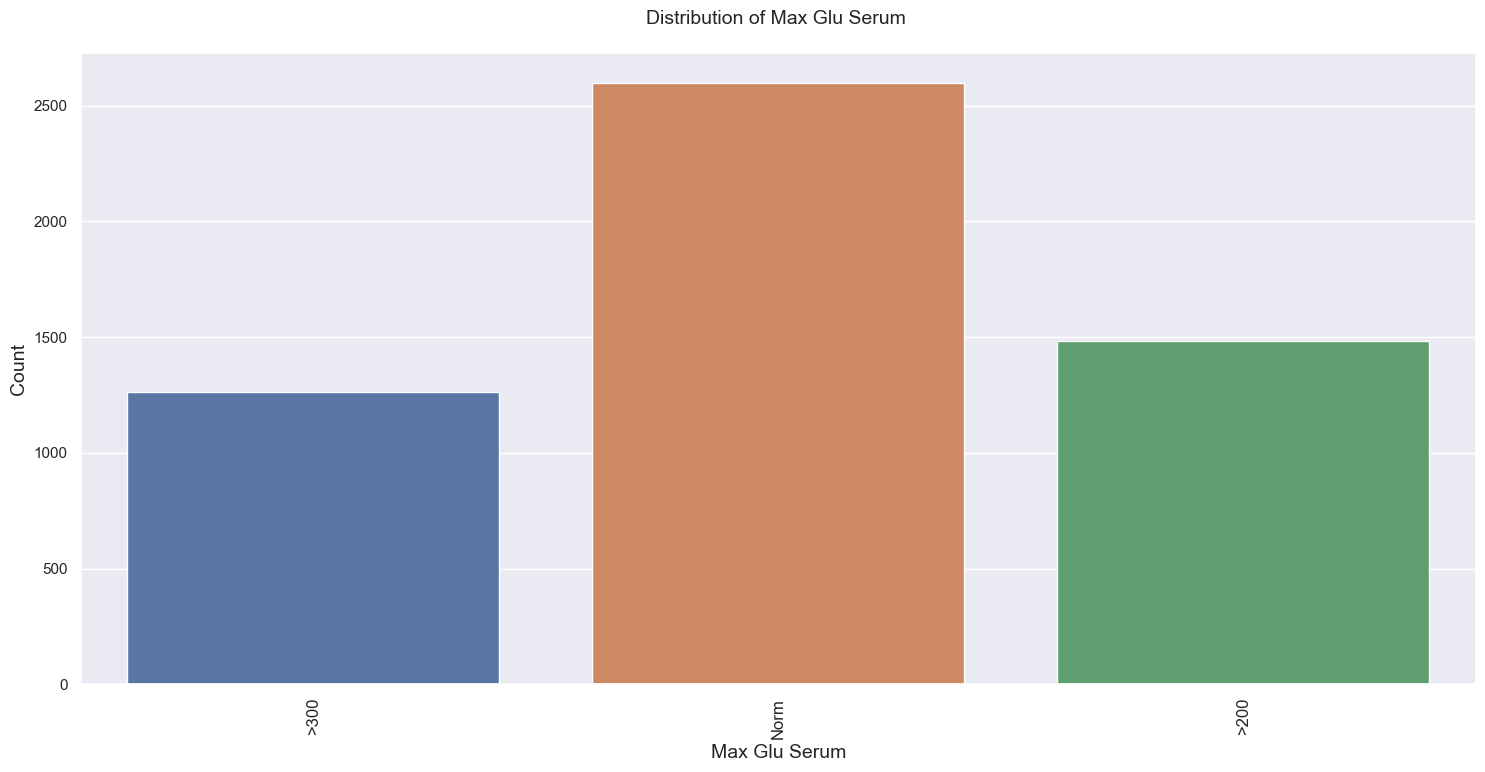

In [64]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='max_glu_serum',   data= df)
plt.xlabel('Max Glu Serum', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Distribution of Max Glu Serum \n', size = 14)
plt.show()

- None means the max_glu_serum  test is not taken and almost 96,000 patients didnt take this test.
- Lets analyze the trend of this for other 3 values with respect to Readmission

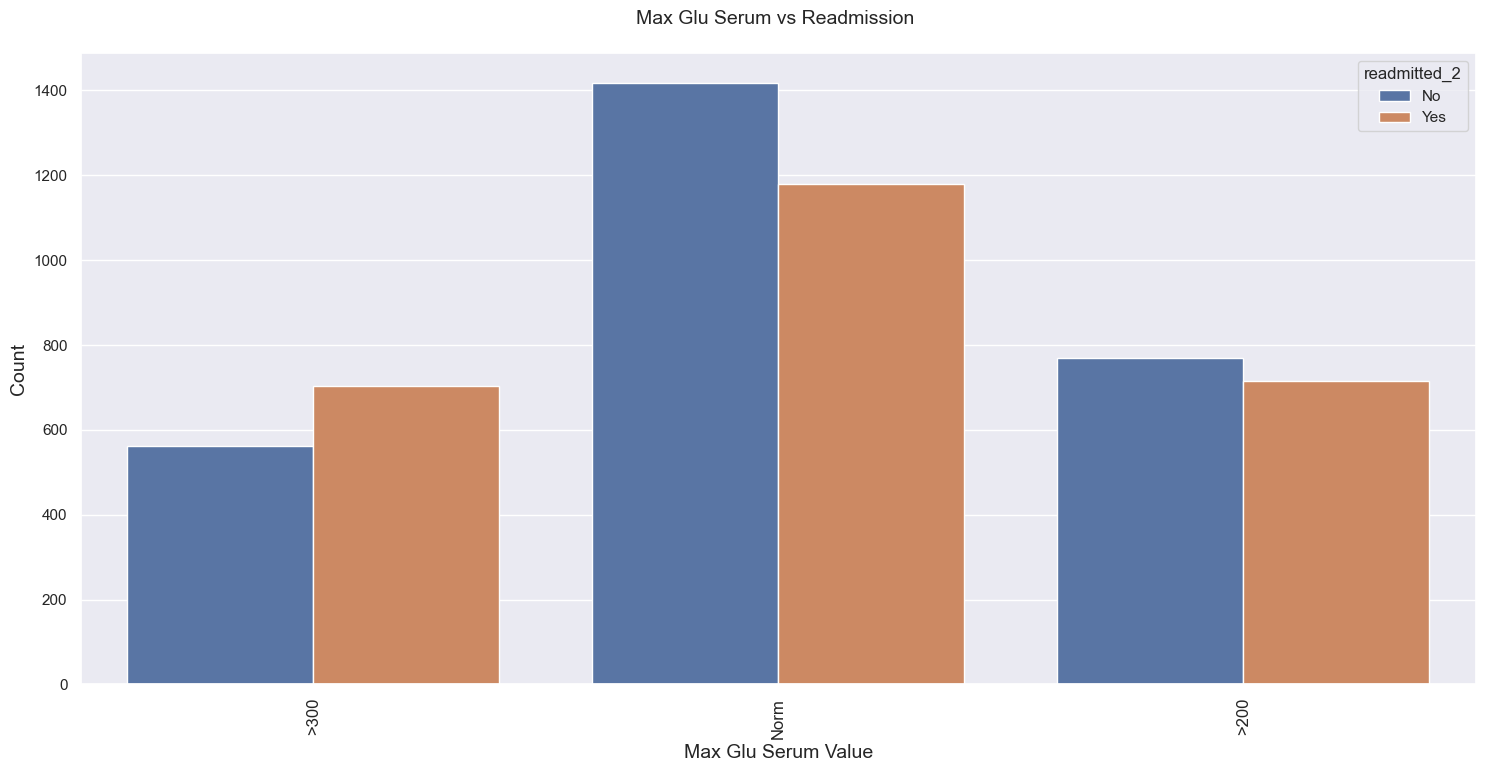

In [65]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='max_glu_serum',  hue= 'readmitted_2', data= df[df['max_glu_serum']!='None'])
plt.xlabel('Max Glu Serum Value', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Max Glu Serum vs Readmission \n', size = 14)
plt.show()

- We can see that if the value of max_glu_serum greater than 300 there is high chance of Readmission as per the above graph.

<b> What is A1Cresult ? </b>

Indicates the range of the result or if the test was not taken. 
Values:

- “>8” if the result was greater than 8%,
- “>7” if the result was greater than 7% but less than 8%,
- “normal” if the result was less than 7%,
- and “none” if not measured

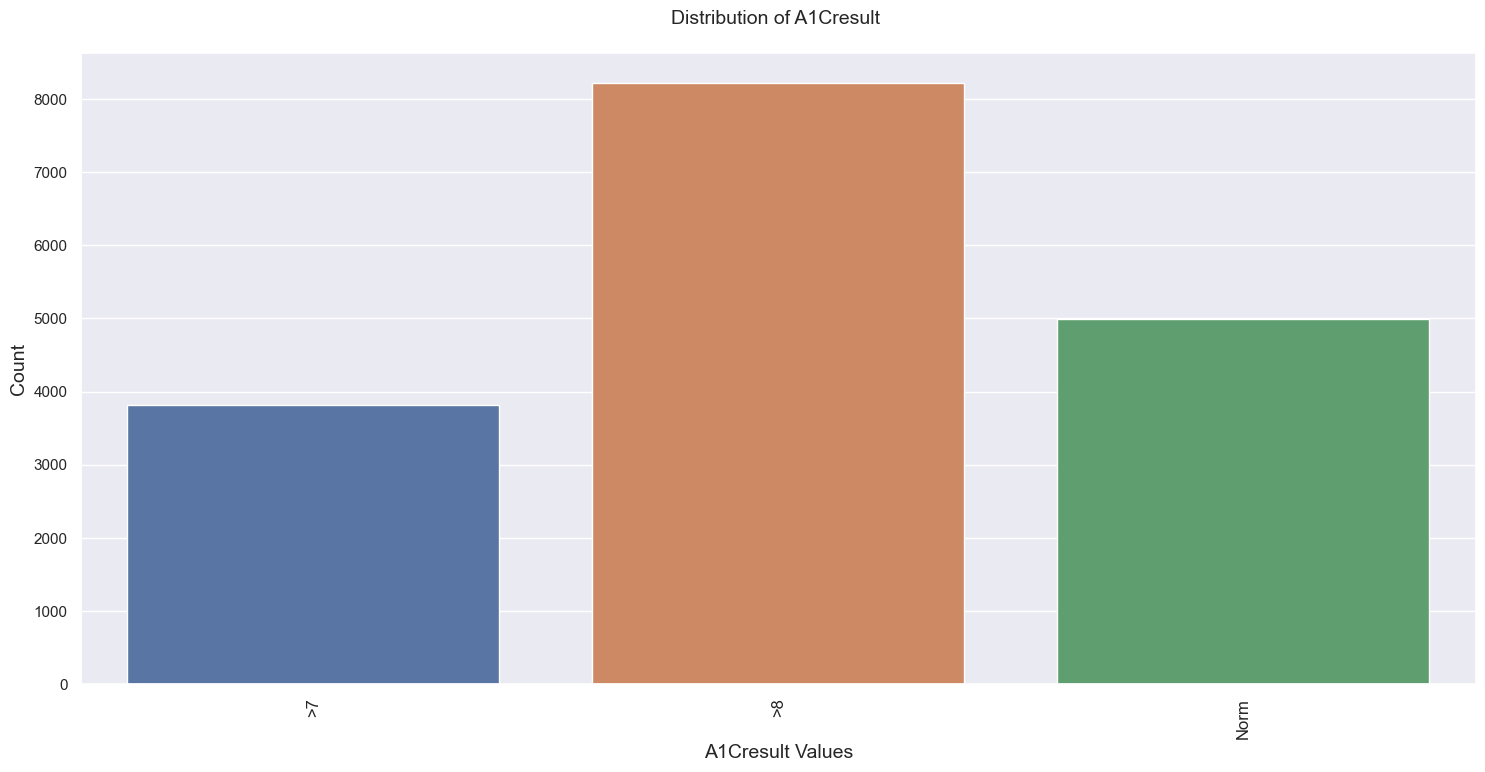

In [66]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='A1Cresult', data= df)
plt.xlabel('A1Cresult Values', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('Distribution of A1Cresult \n', size = 14)
plt.show()

- Majority of the patients have None values, means this parameter if not measured. 
- Lets look at other 3 values and check the relationship

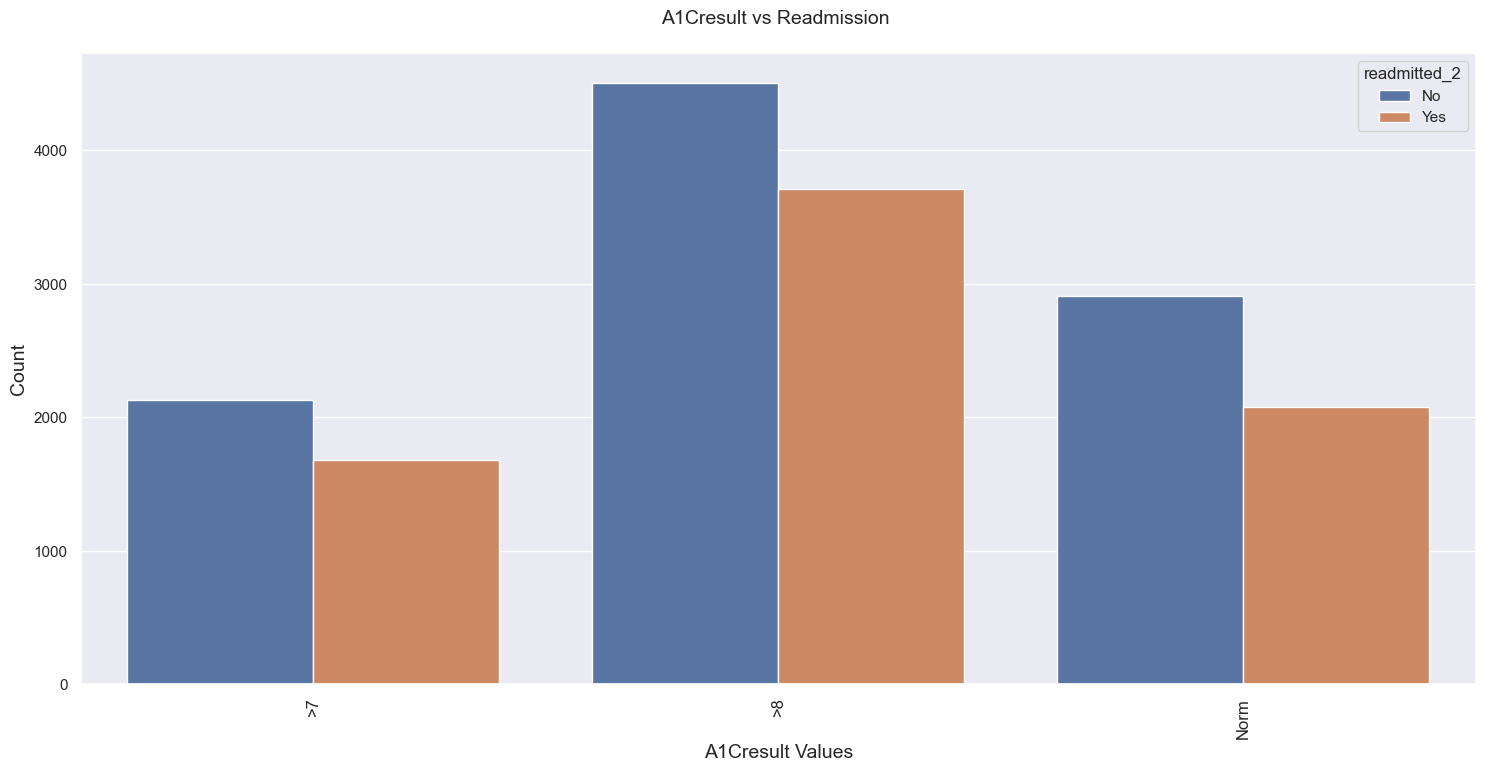

In [67]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='A1Cresult', hue = 'readmitted_2', data=df[df['A1Cresult']!='None'])
plt.xlabel('A1Cresult Values', size = 14)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 14)
plt.title('A1Cresult vs Readmission \n', size = 14)
plt.show()

There are more values values for Not Readmitted in each category. 

<b>What is change?</b>

Indicates if there was a change in diabetic medications (either dosage or generic
name). Values:

- “change”  
- “no change”

In [68]:
df['change'].value_counts()

change
No    54754
Ch    47009
Name: count, dtype: int64

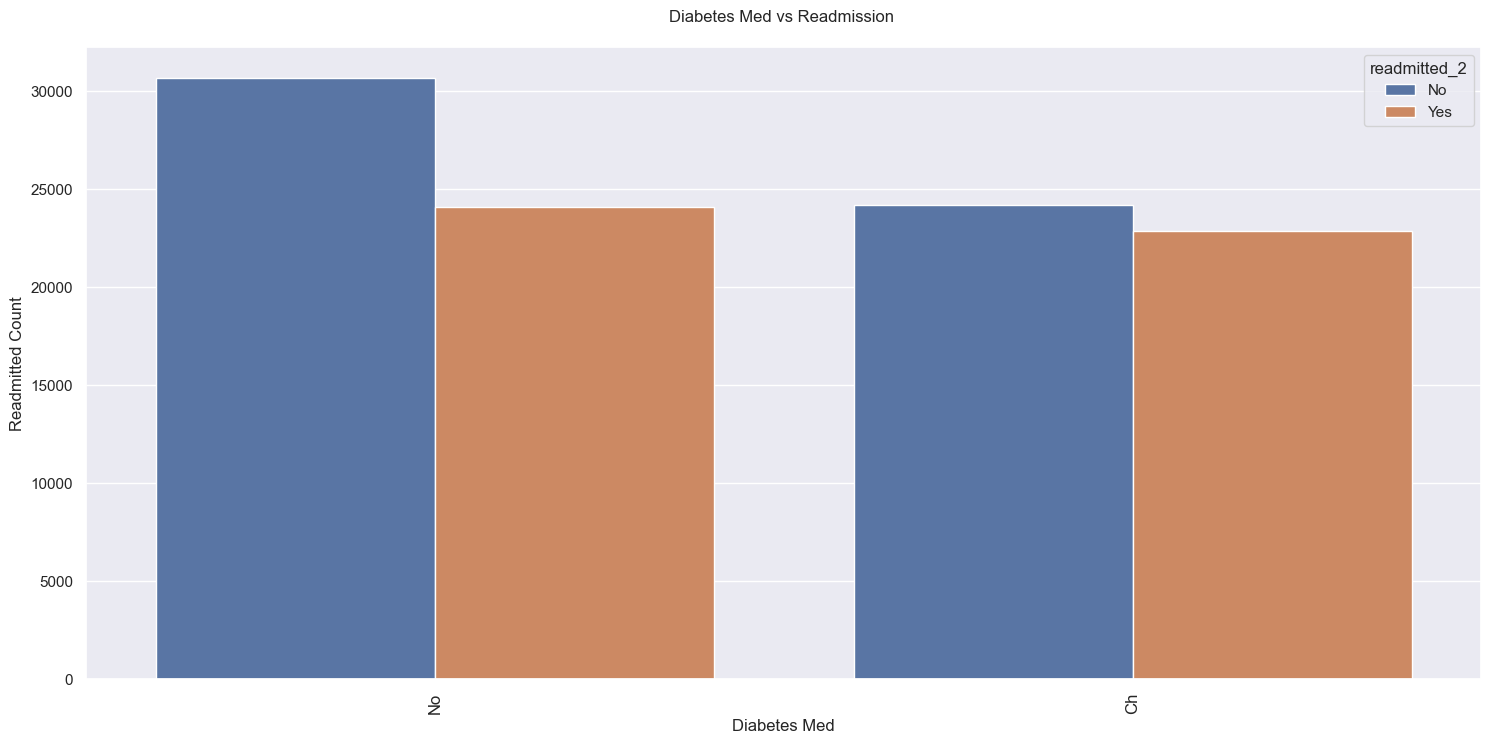

In [69]:
ax = sns.countplot(x='change',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

<b>What is Diabetes Med ? </b>

Indicates if there was any diabetic medication prescribed. Values:

- “yes”
- “no”

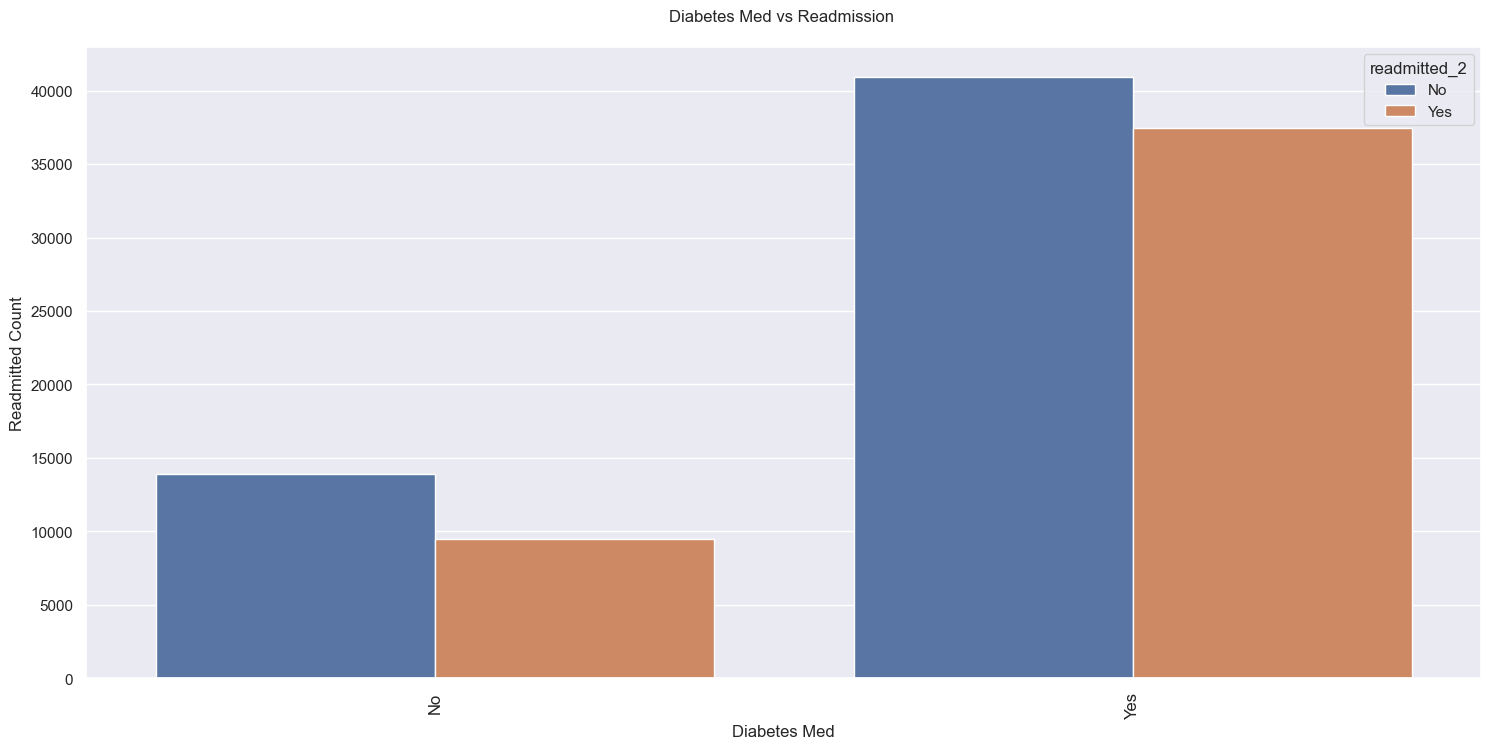

In [70]:
ax = sns.countplot(x='diabetesMed',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

- From above figure we can see that, the Patient with Diabetes have the high amount of readmissions.

<b>24 Features for Medications?</b>

For the generic names: 
1. metformin 
2. repaglinide 
3. nateglinide
4. chlorpropamide
5. glimepiride
6. acetohexamide
7. glipizide
8. glyburide
9. tolbutamide 
10. pioglitazone
11. rosiglitazone
12. acarbose
13. miglitol
14. troglitazone
15. tolazamide
16. examide
17. sitagliptin
18. insulin
19. glyburide-metformin
20. glipizide-metformin
21. glimepiride-pioglitazone
22. metformin-rosiglitazone
23. metformin-pioglitazone

The feature indicates whether the drug was prescribed or there was a change in the dosage. Values:

- “up” if the dosage was increased during the encounter
- “down” if the dosage was decreased
- “steady” if the dosage did not change
- “no” if the drug was not prescribed

<b> Lets Analyze Distribution of each value in these columns! </b>

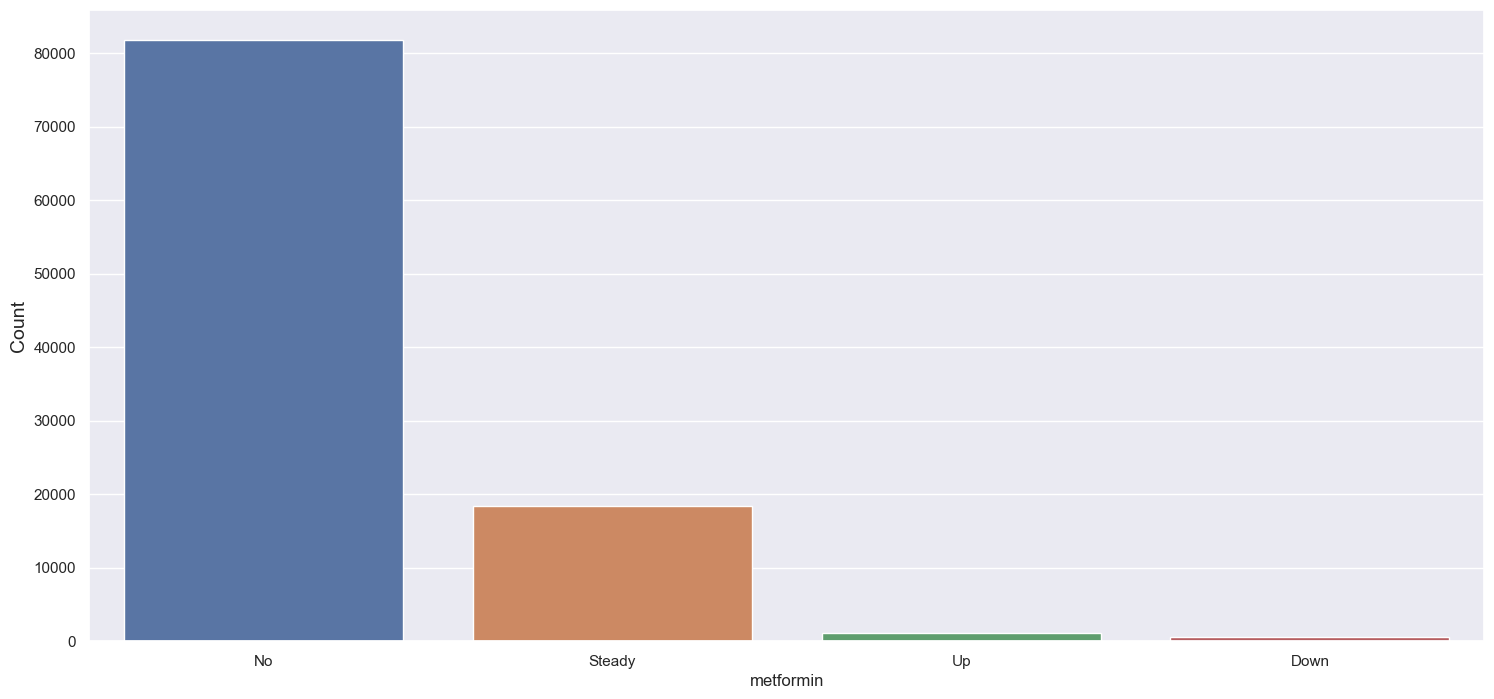

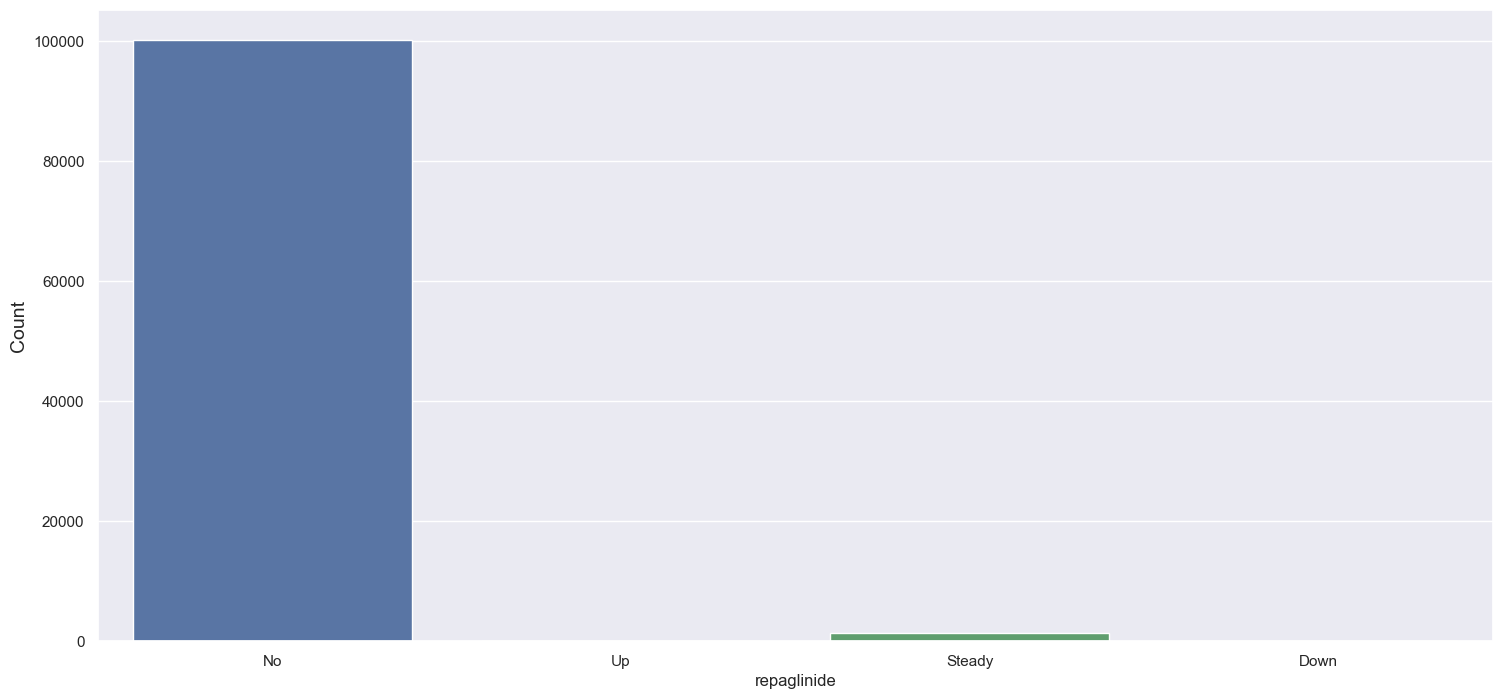

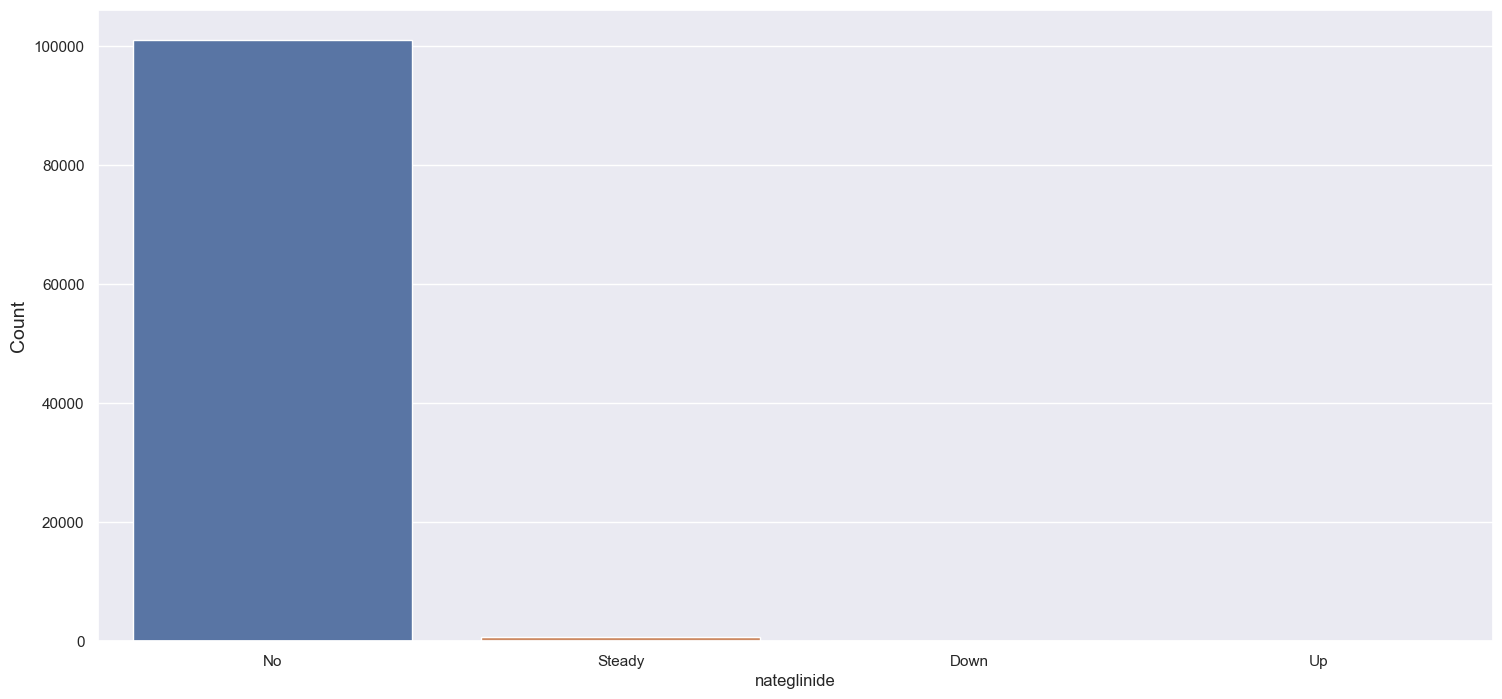

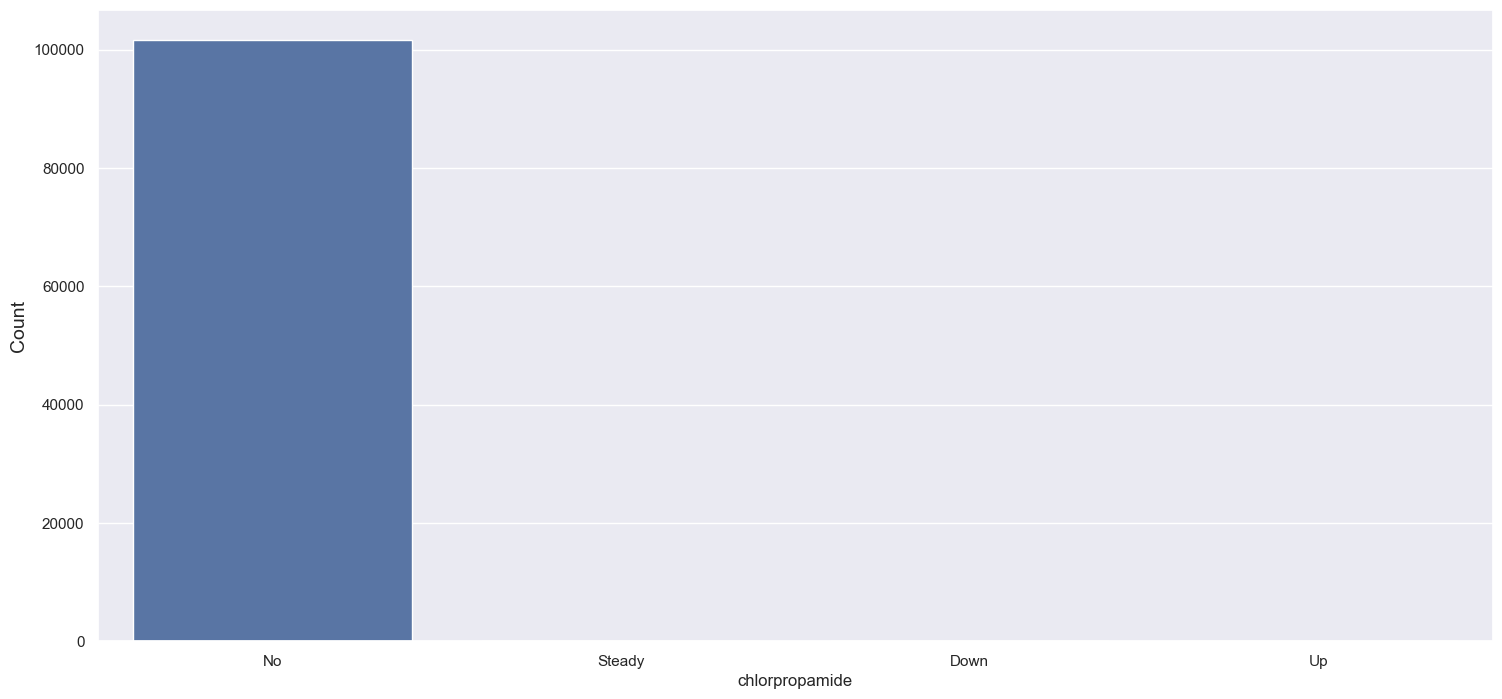

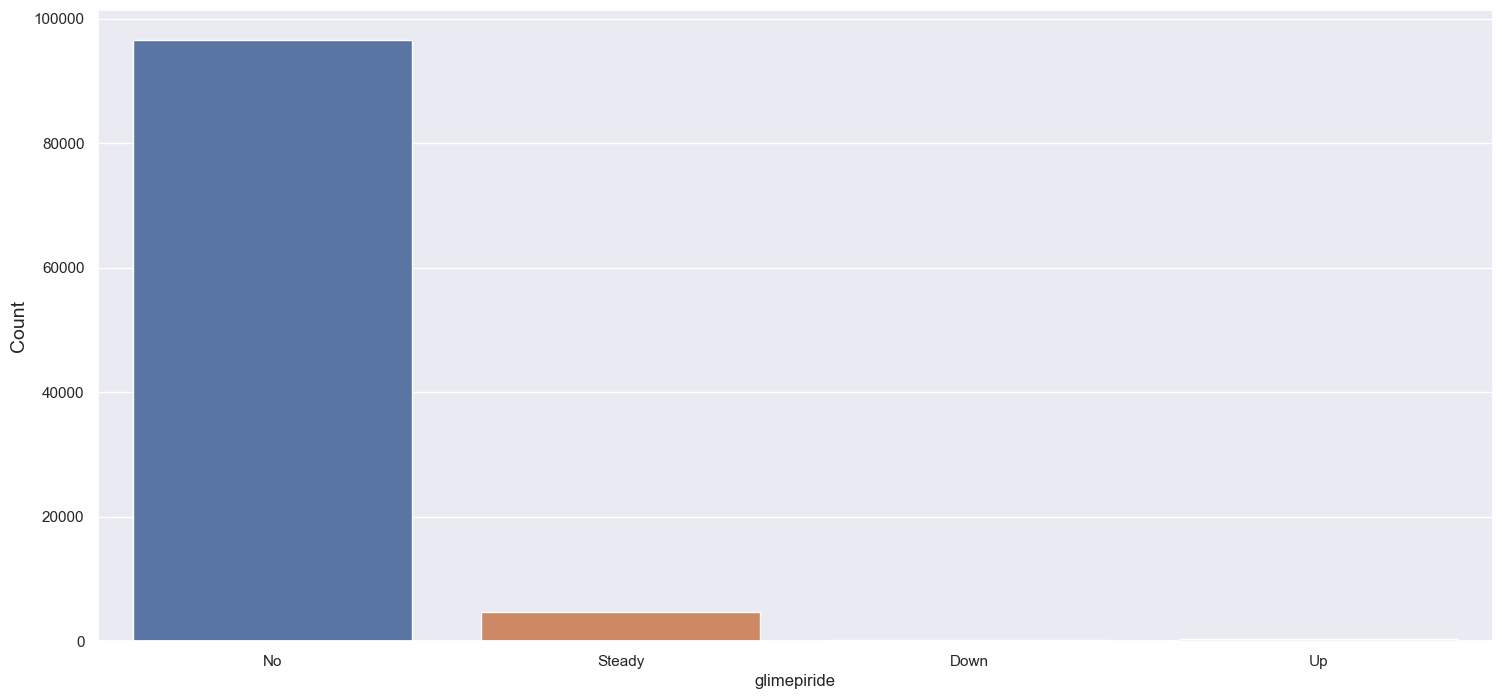

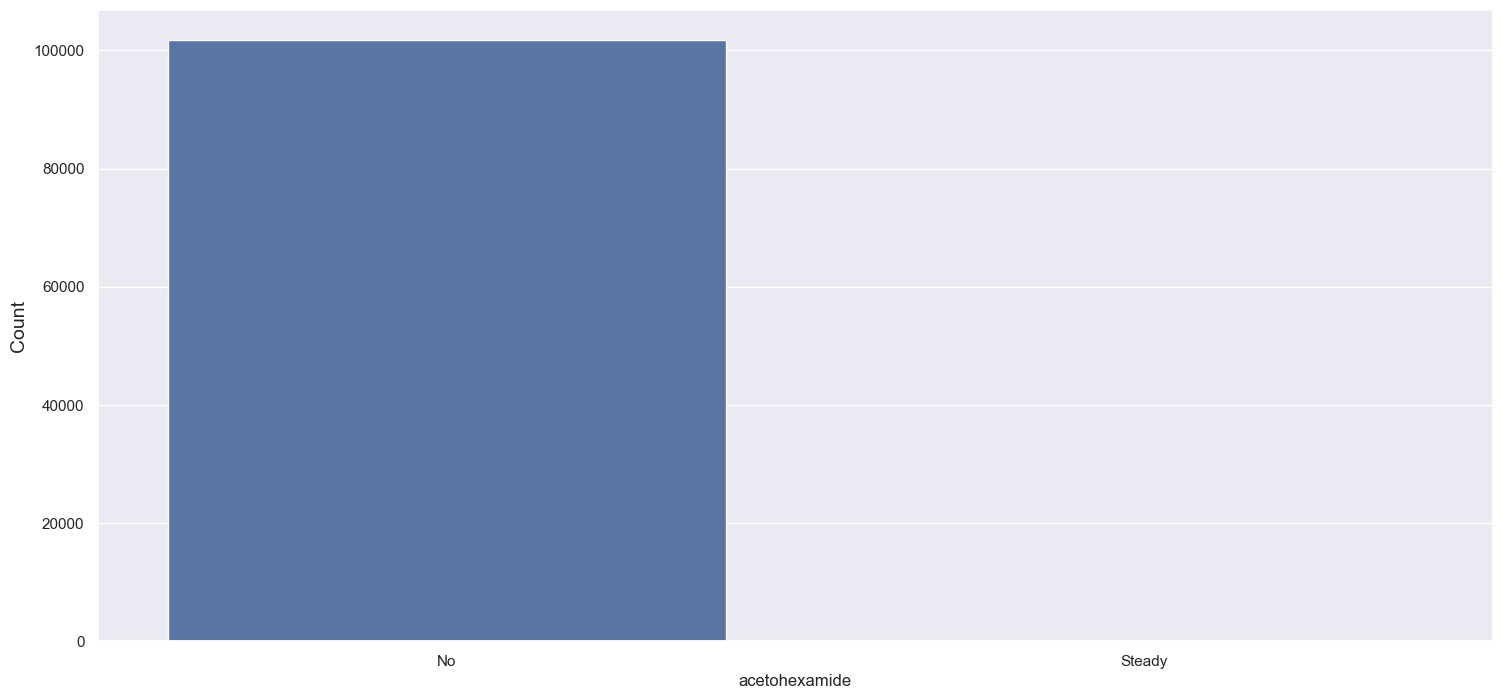

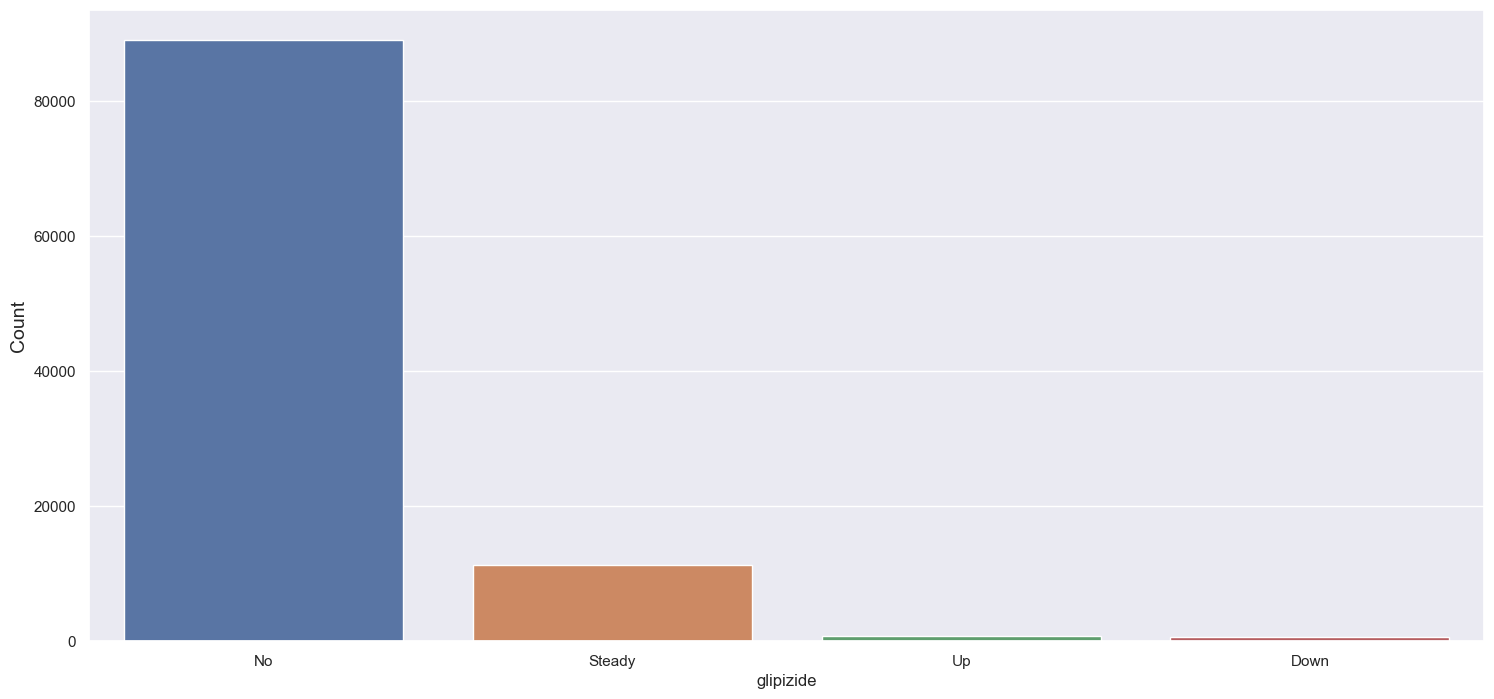

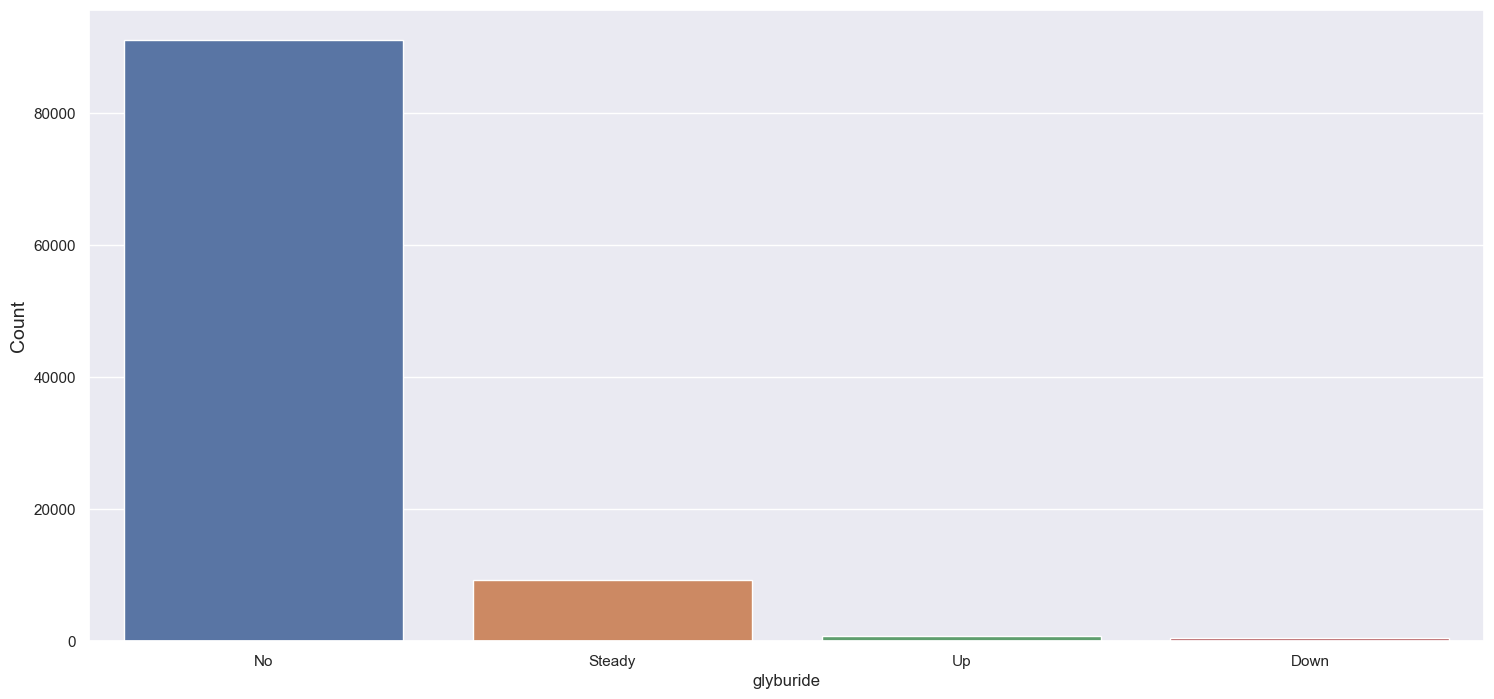

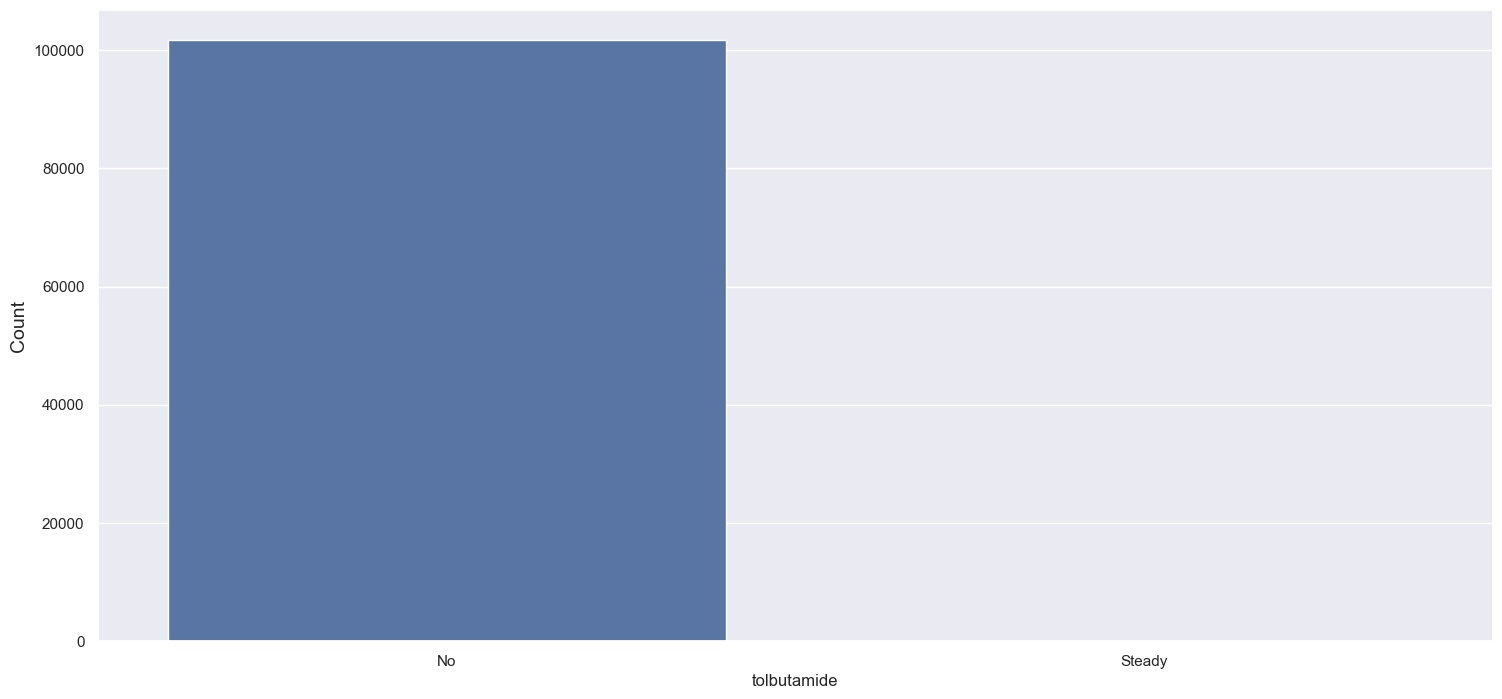

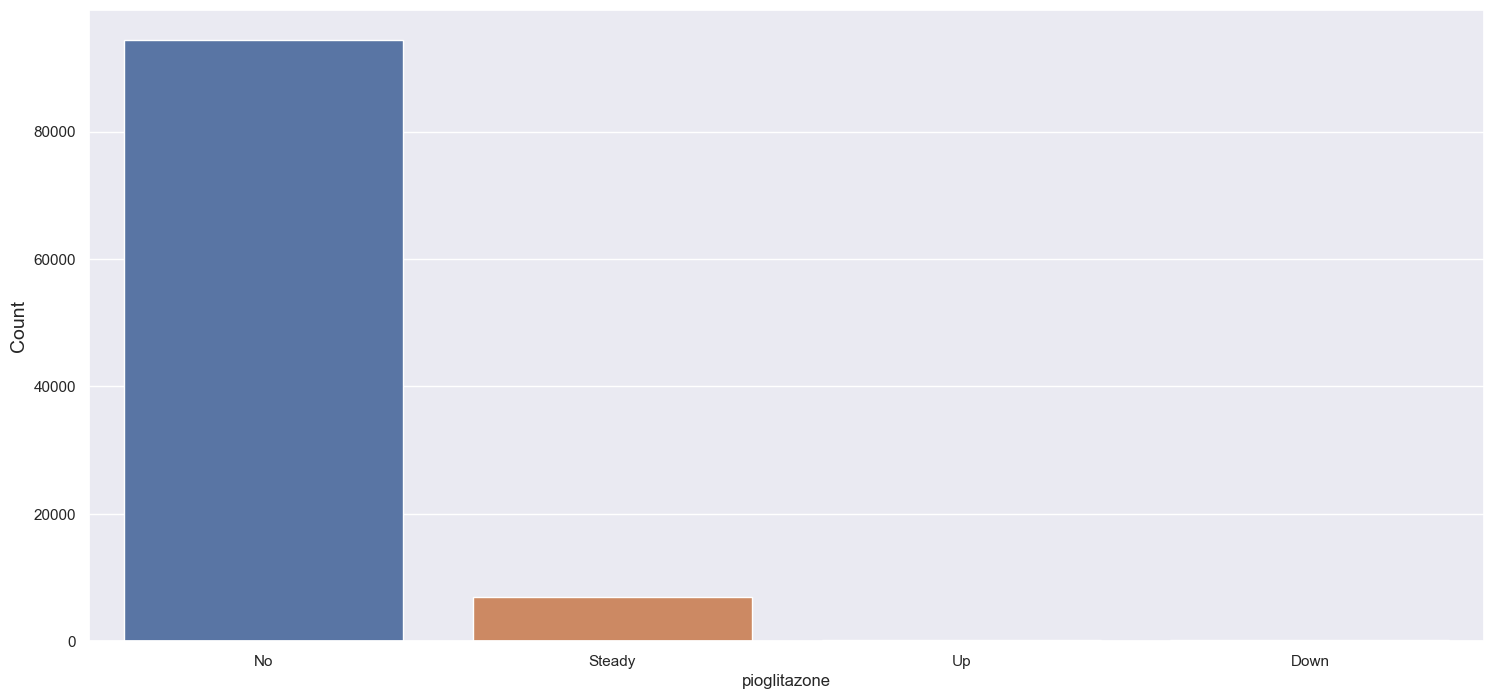

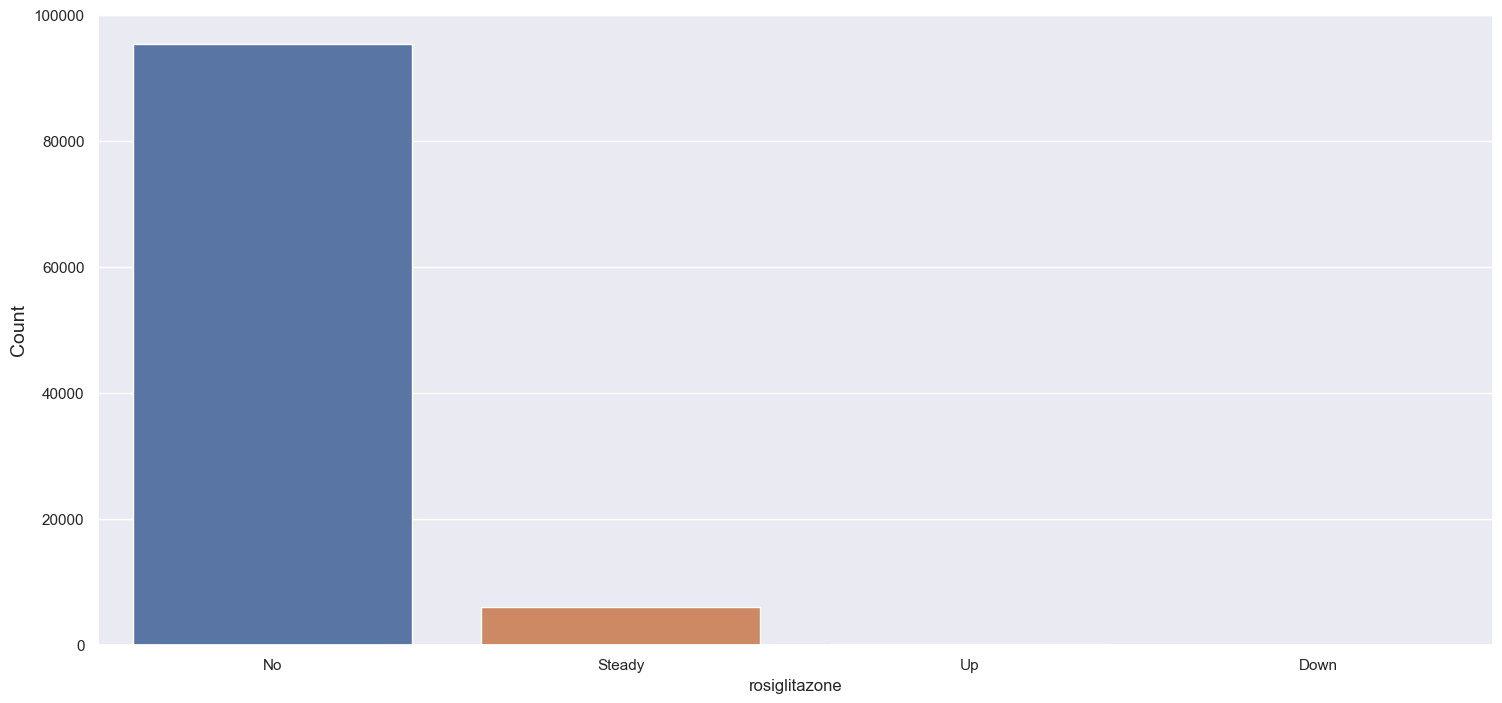

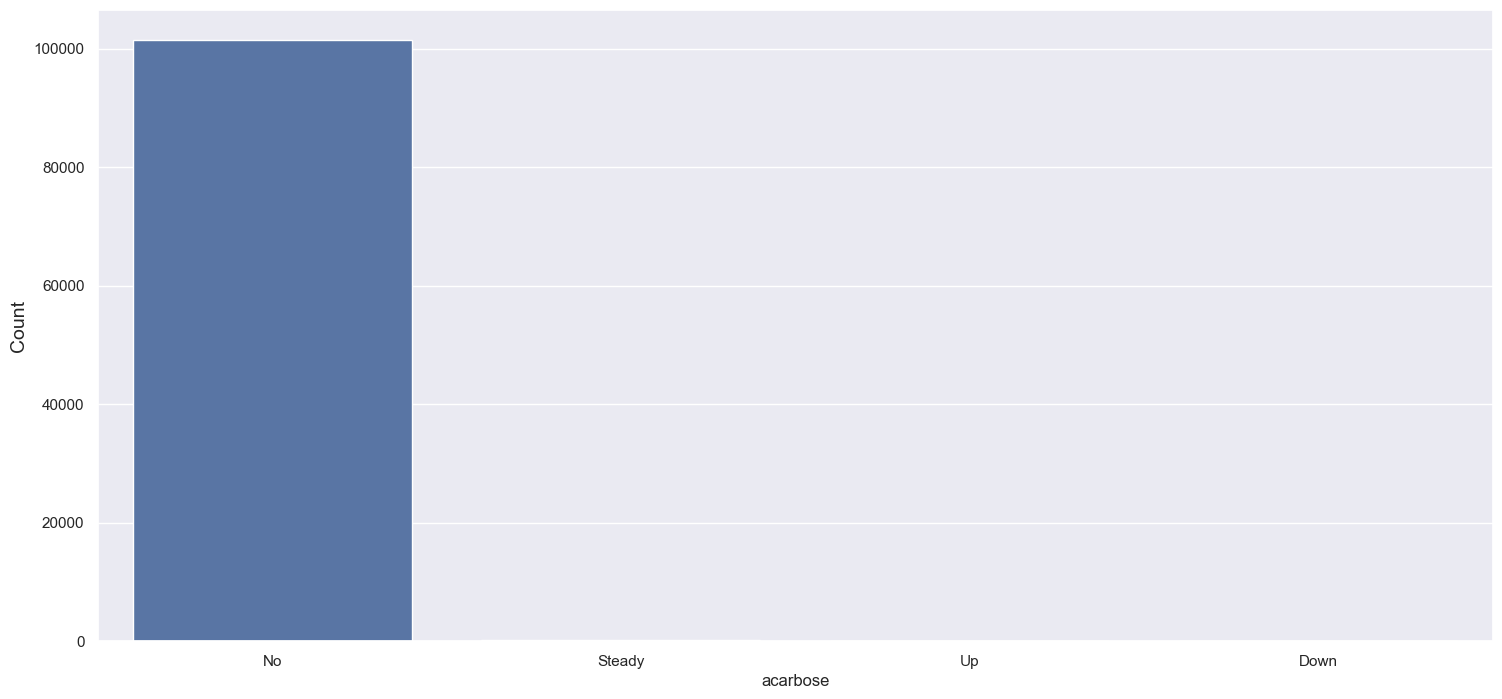

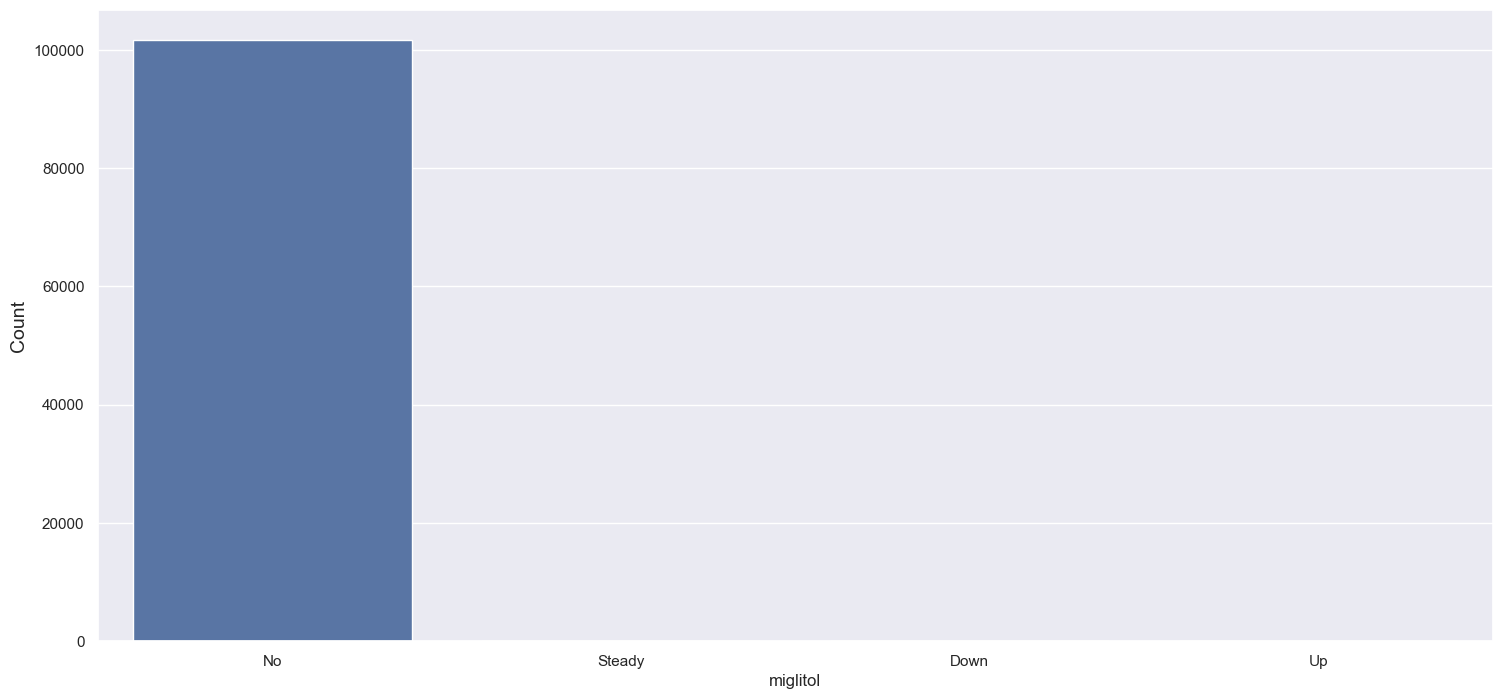

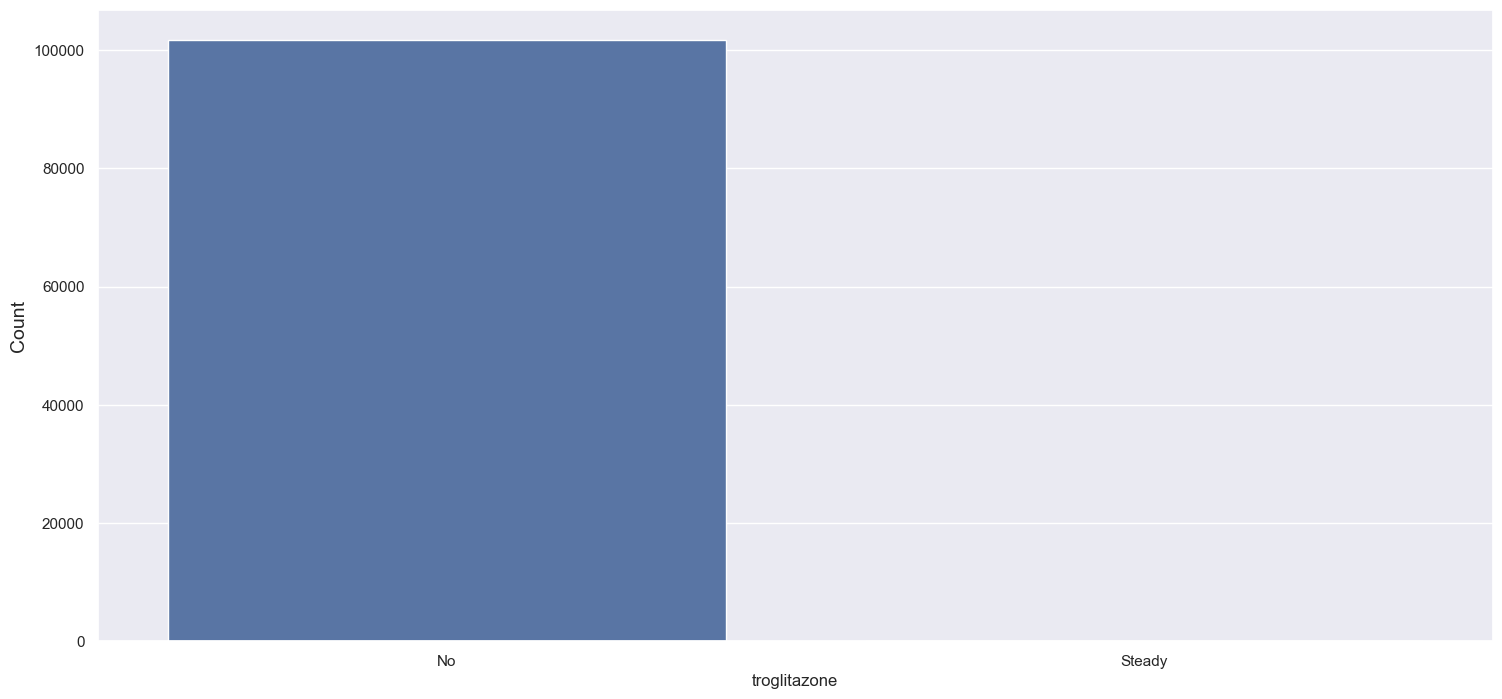

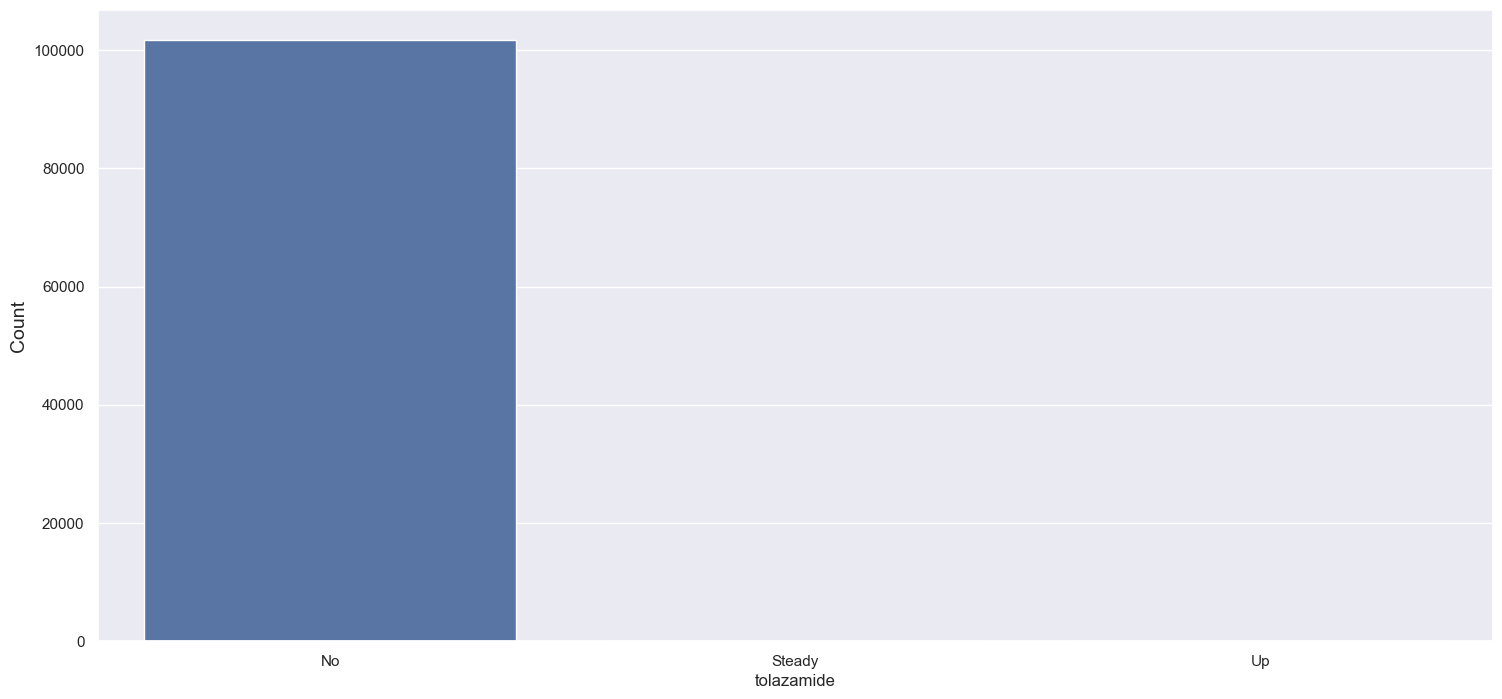

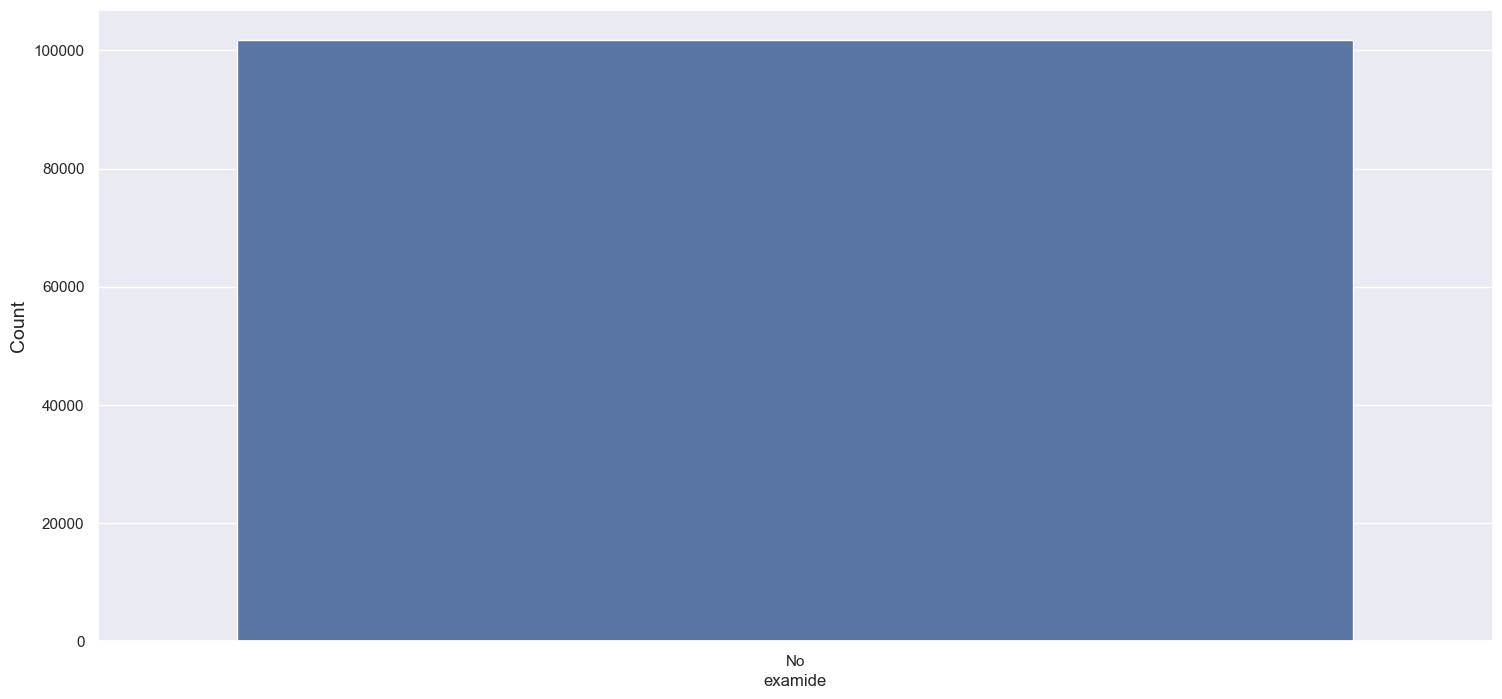

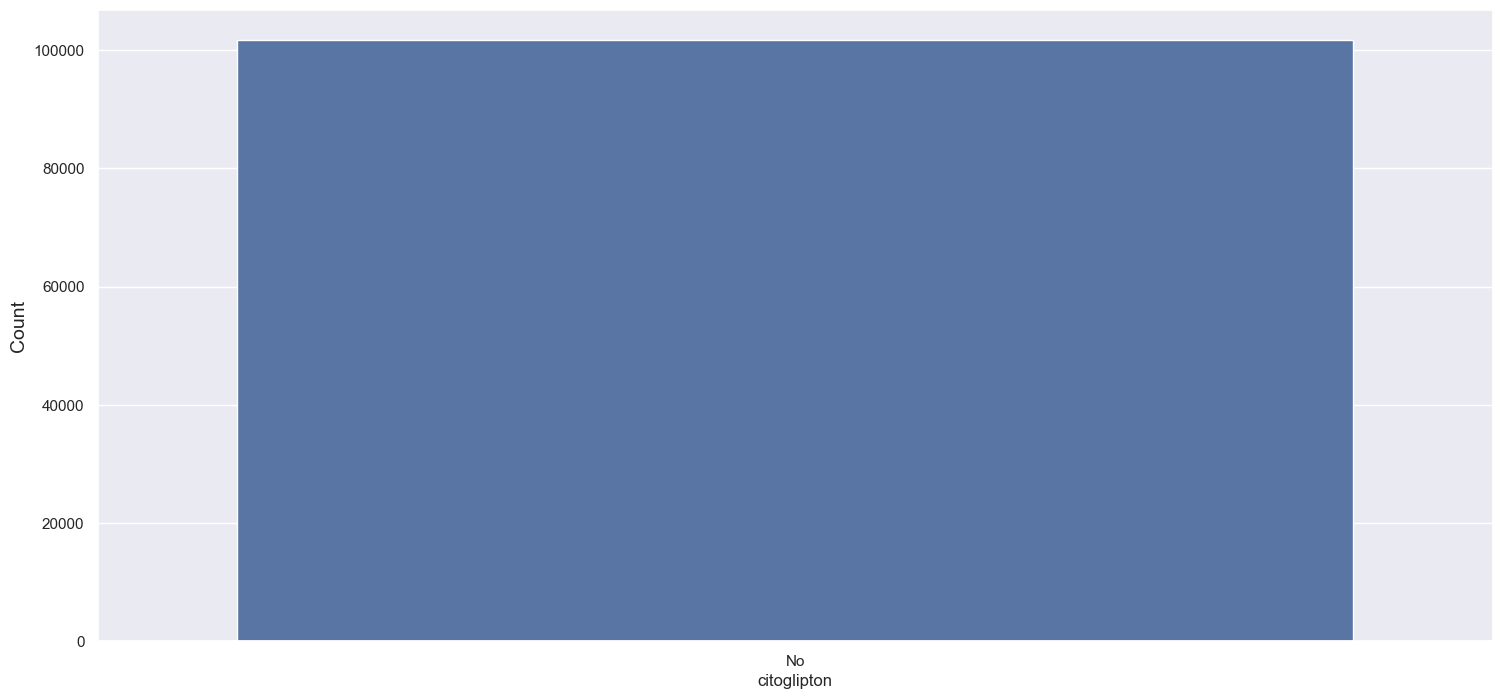

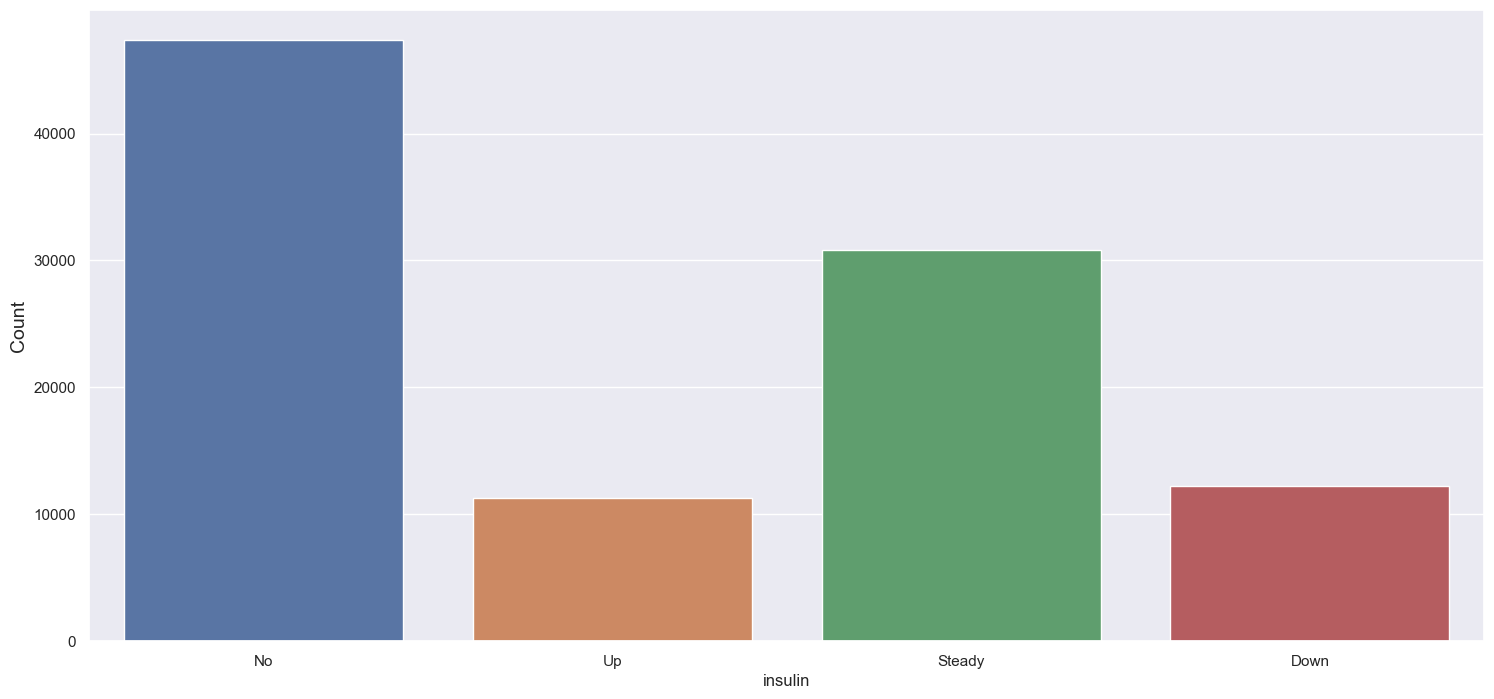

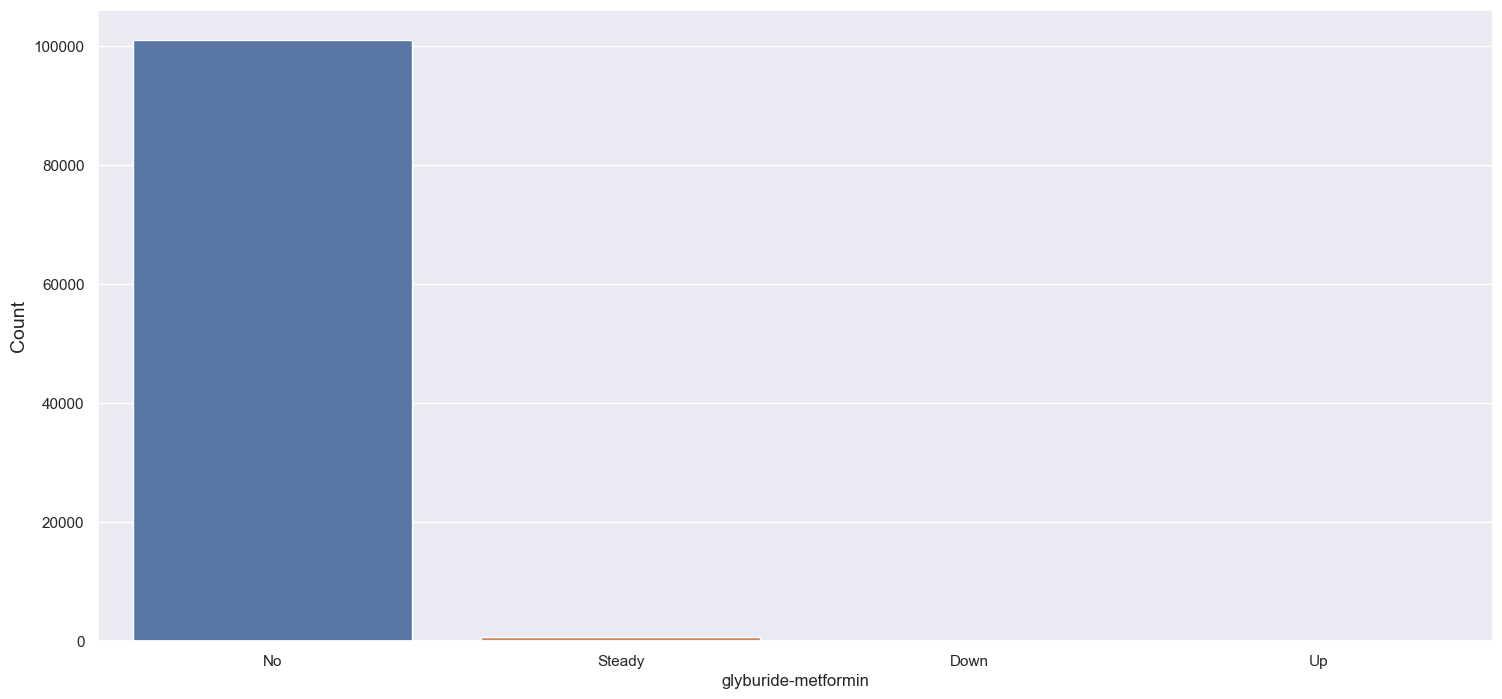

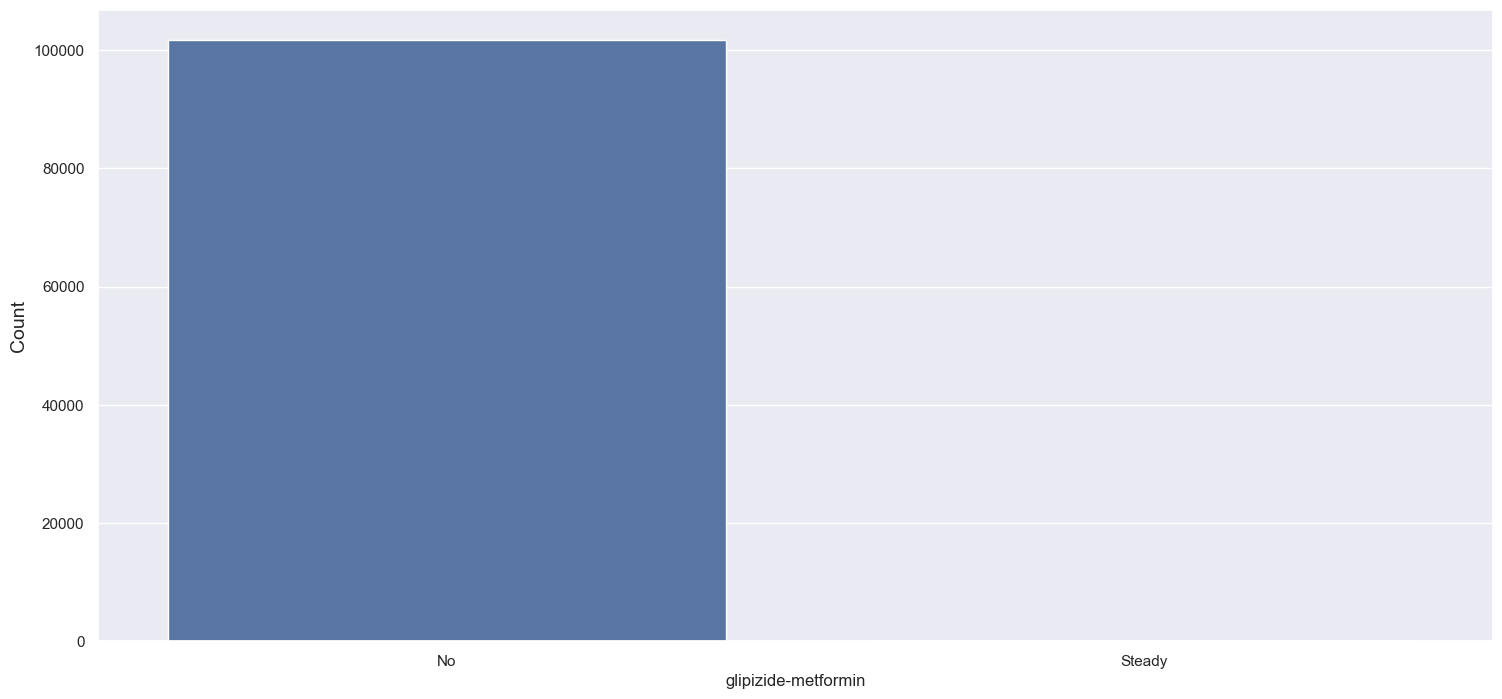

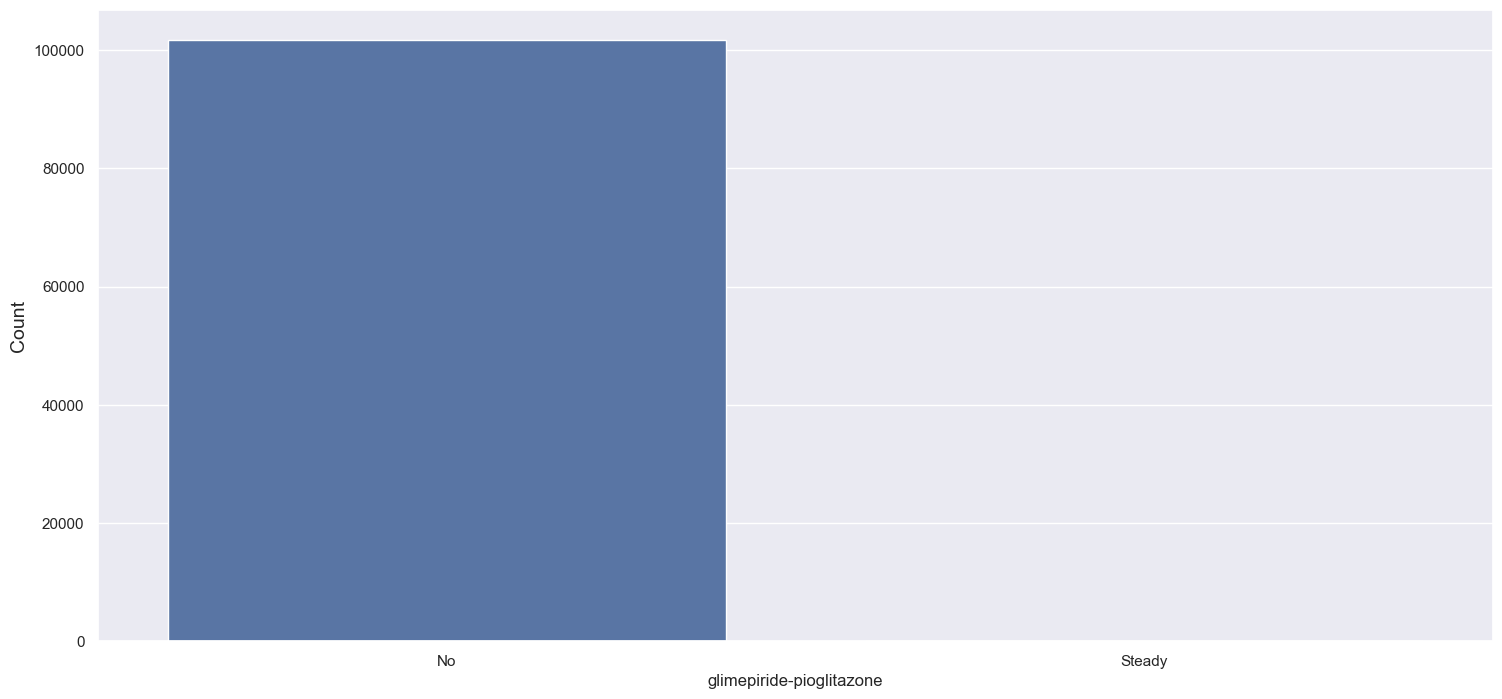

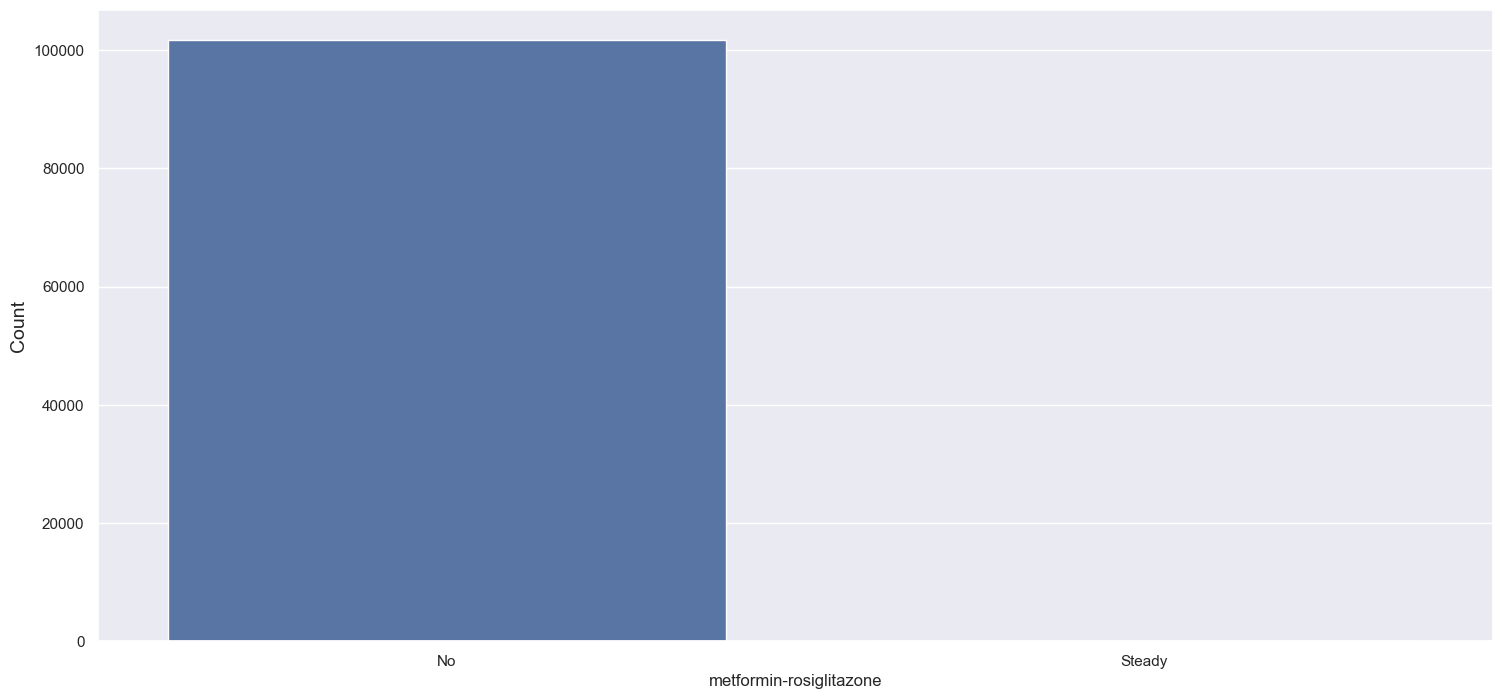

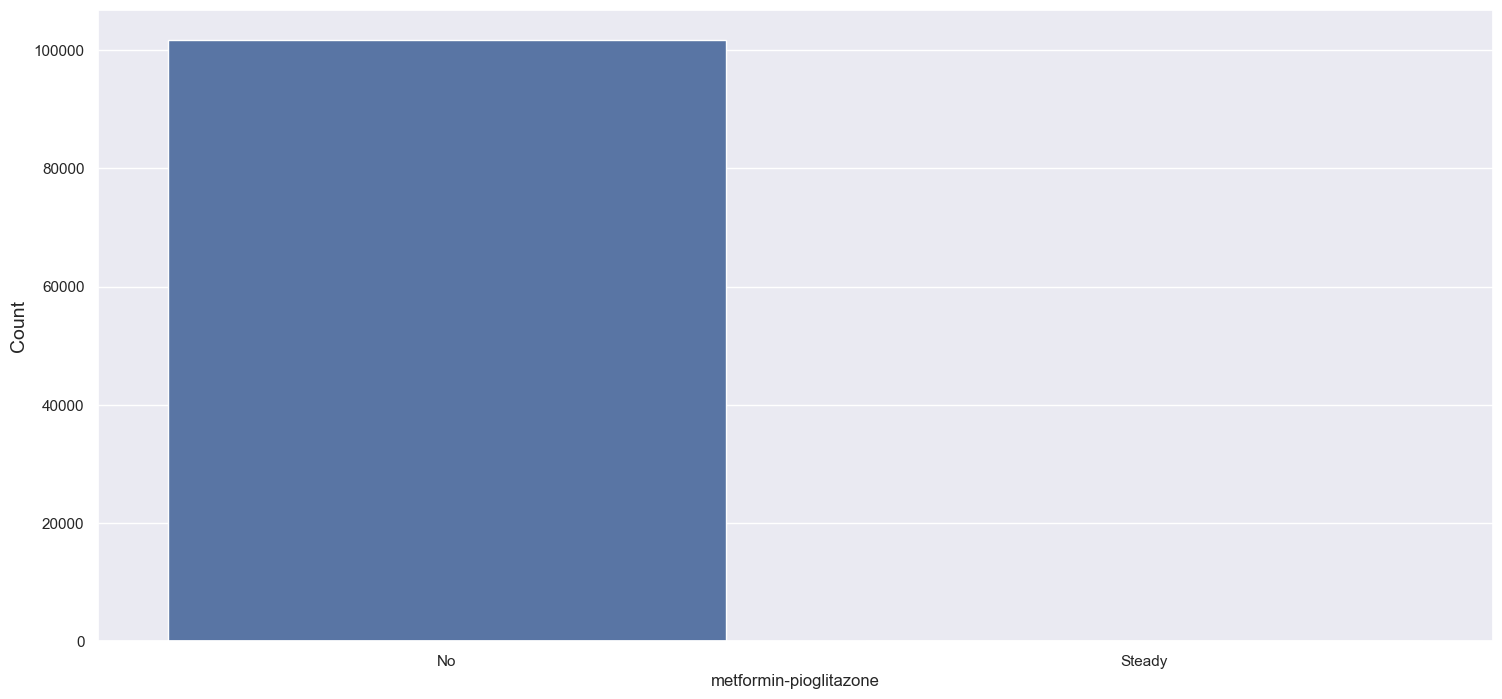

In [71]:
for i in df.iloc[:, 21:44].columns:

    ax = sns.countplot(x=i, data= df)
#     plt.xticks(rotation=90, size = 12)
    plt.ylabel('Count', size = 14)
    plt.show()

- From the above count plots, we can see that majority of the Medicines are not assigned to patients.
- If one is assigned then it is assigned to very few people.

<b> Analyze Medicines with Class Variable Readmission </b>

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


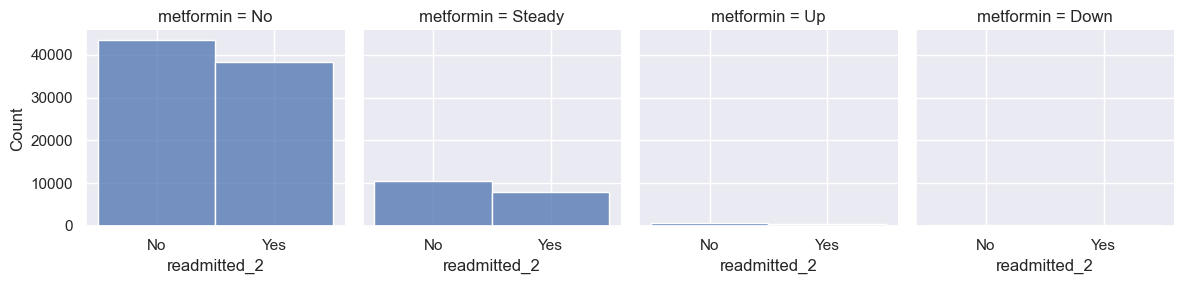

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


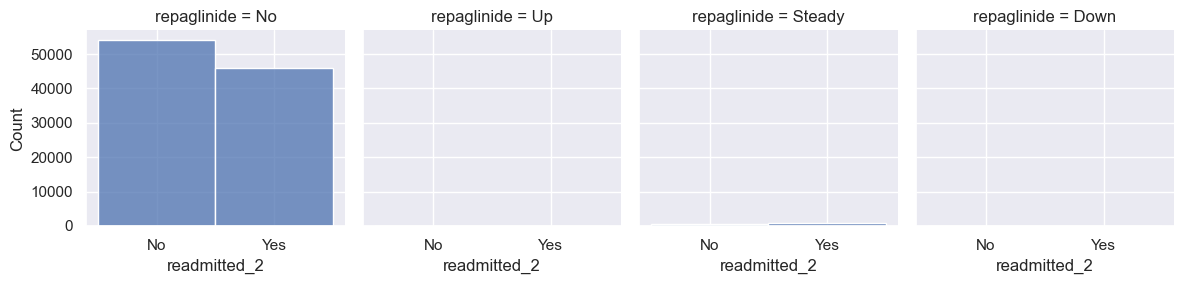

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


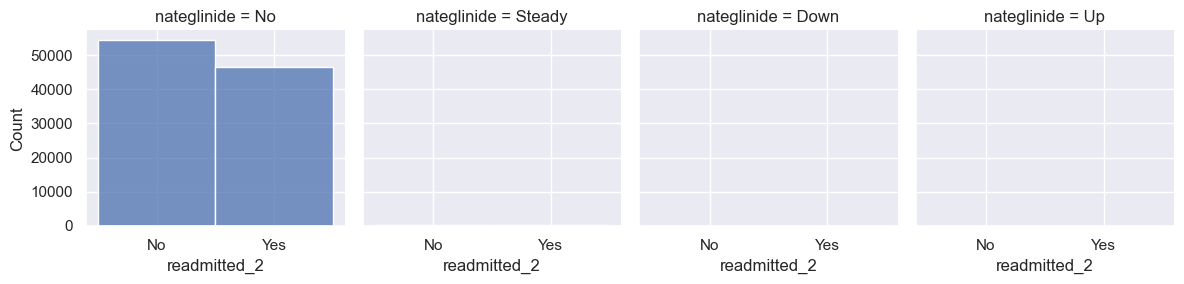

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


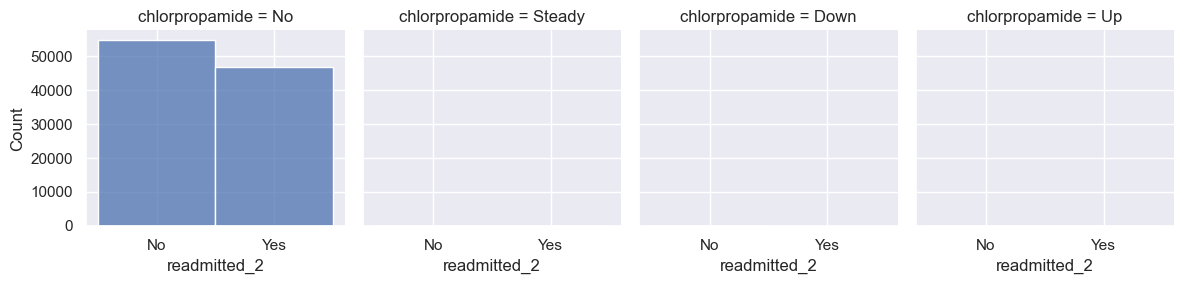

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


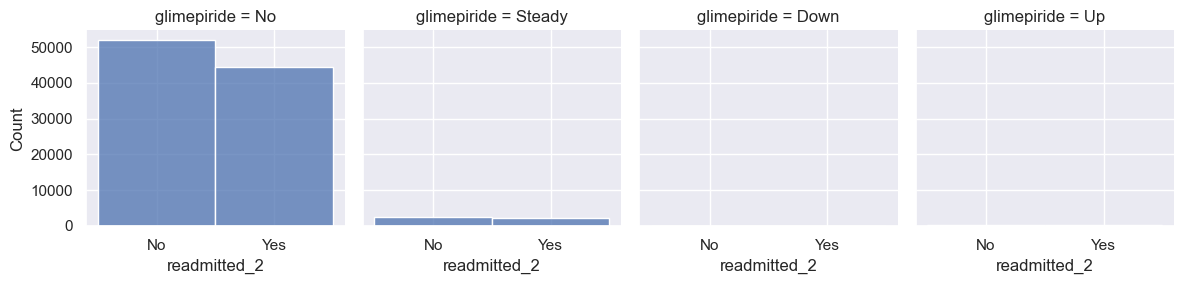

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


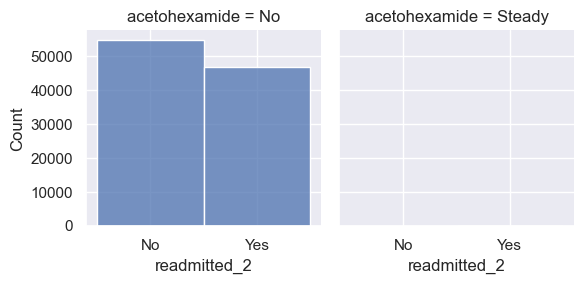

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


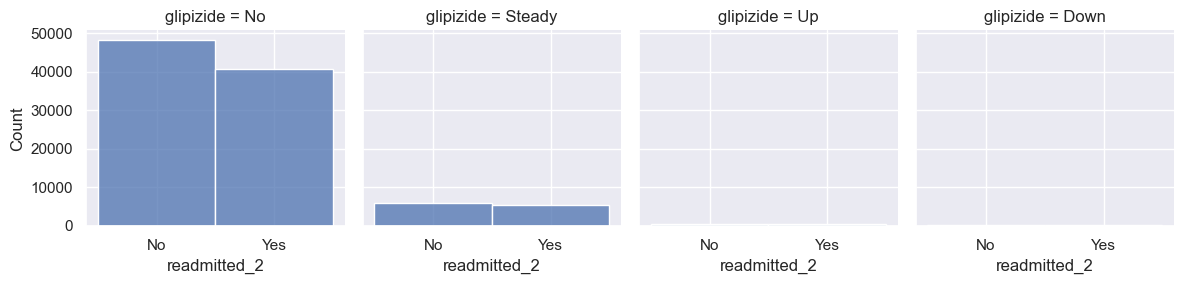

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


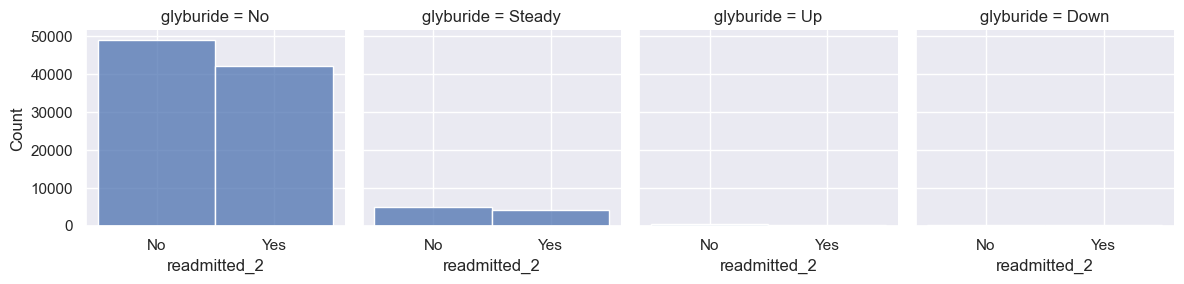

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


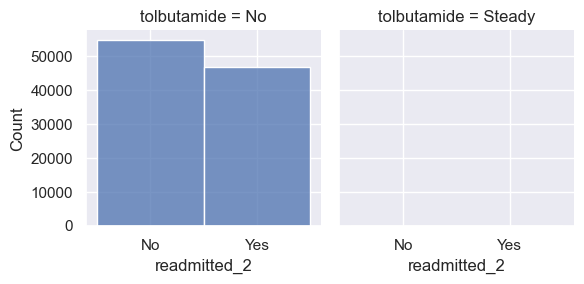

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


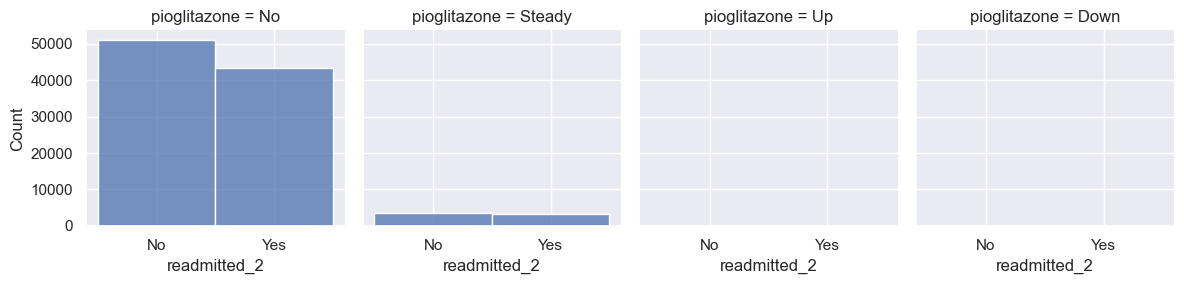

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


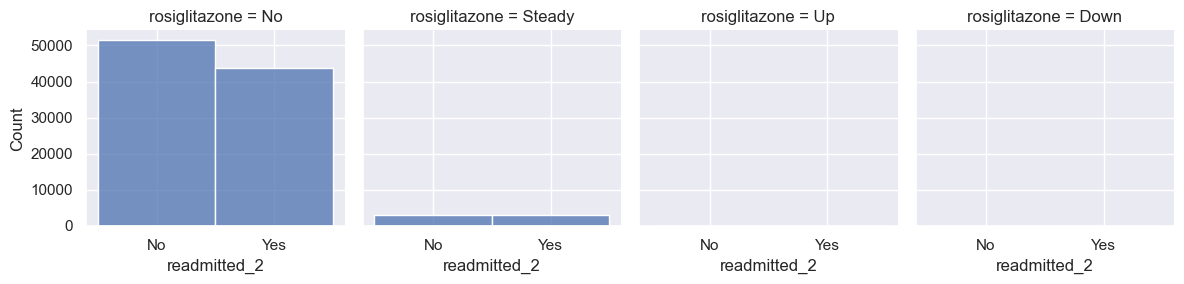

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


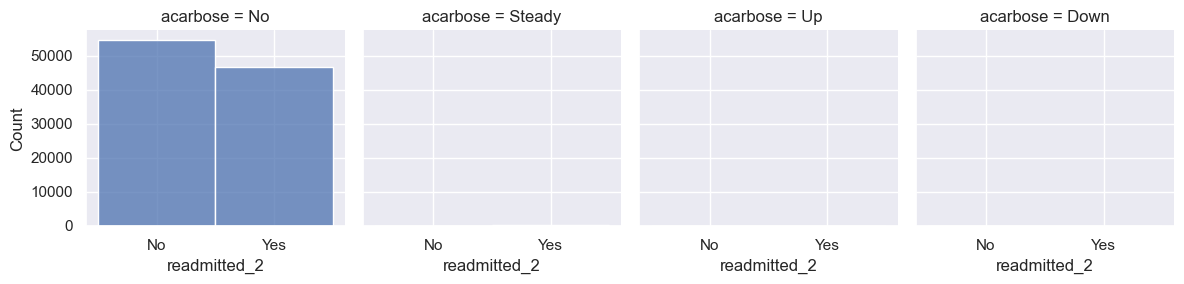

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


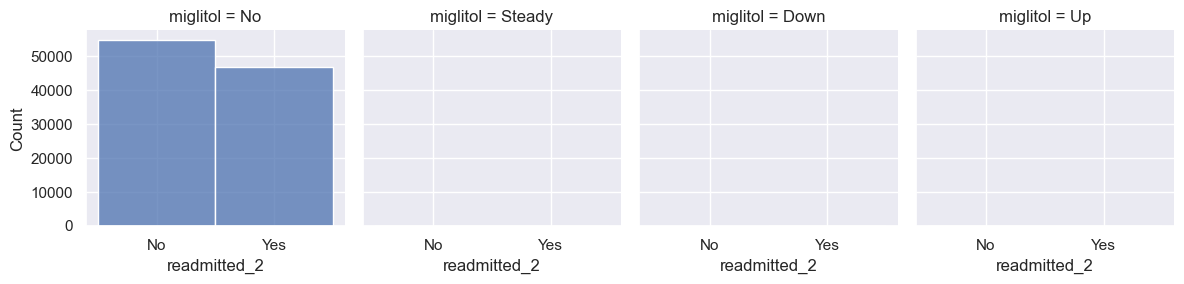

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


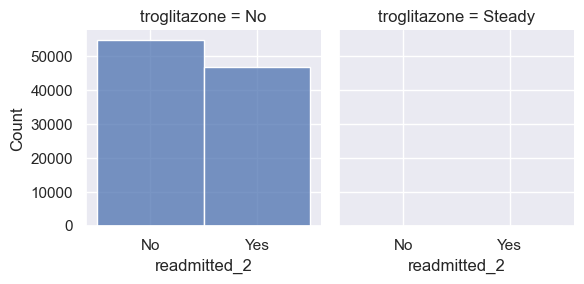

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


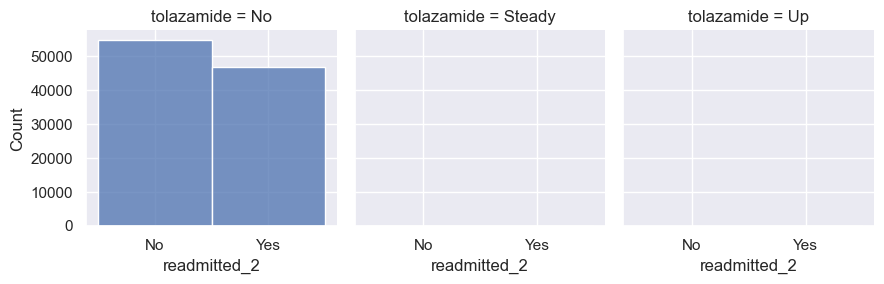

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


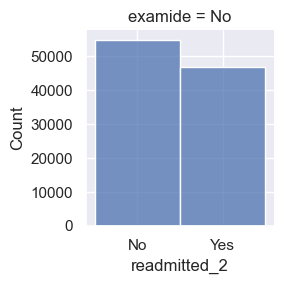

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


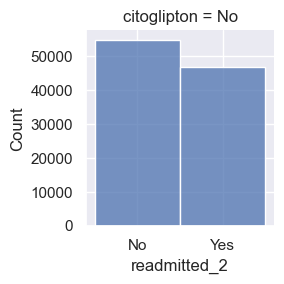

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


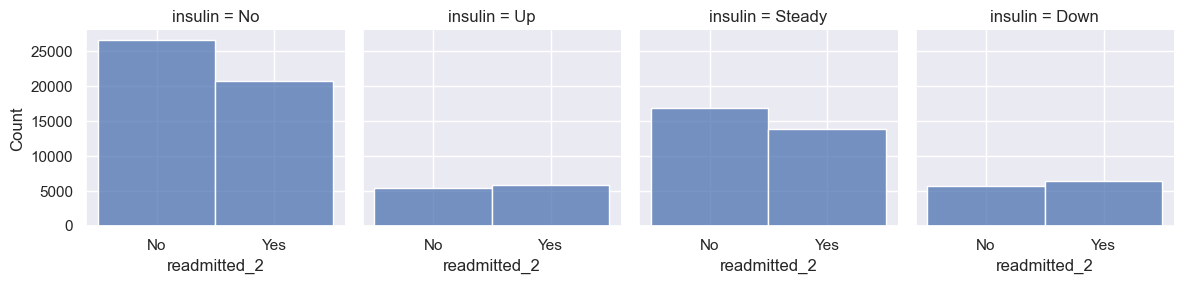

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


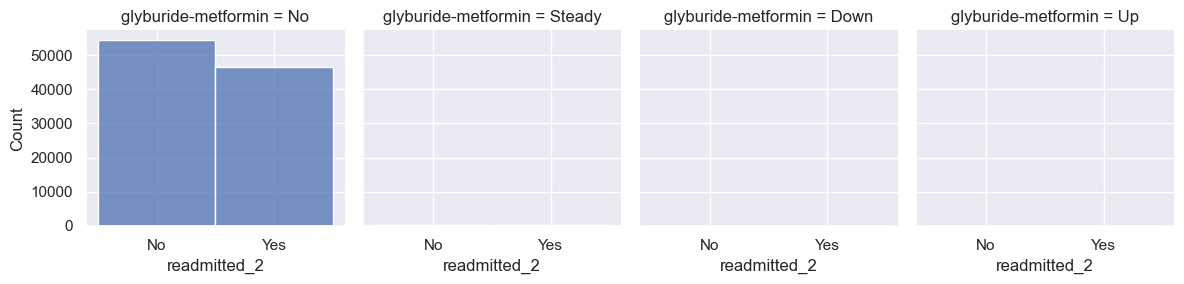

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


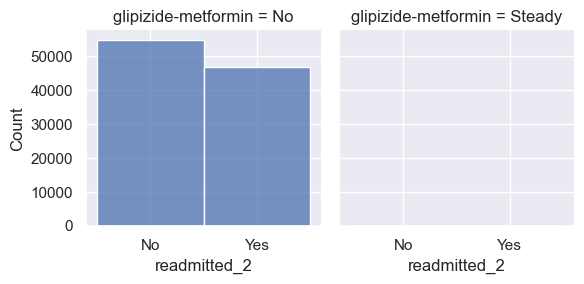

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


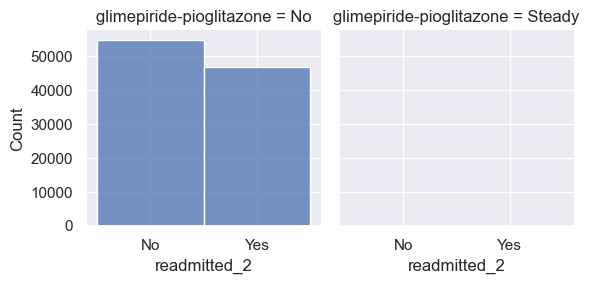

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


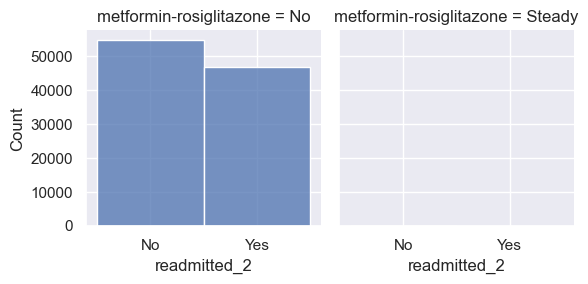

/Users/prathyushareddynandikonda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


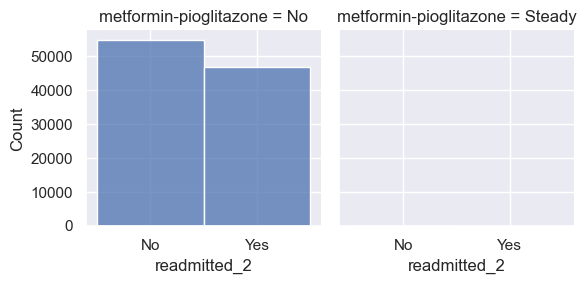

In [72]:
for columnName in df.iloc[:, 21:44].columns:
    g = sns.FacetGrid(df, col=columnName)
    g.map(sns.histplot, "readmitted_2")
#     plt.title(str(columnName) + 'vs Readmission', size = 13)
    plt.show()

In all of the features, Majority of the population is labeled as No. Means patients are not perscribed to take these medicines. 

- <b>Insulin </b> : In case of Insulin Half of the population is perscribed to it. 
- <b>metformin </b> : In case of Metformin, almost 18000 patients are prescribed.
- <b> examide & citoglipton </b> : No one is prescribed to examide, all the values are "No". So we will drop these columns
- <b> glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone</b> : These medicines are prescribed to very few people. 
- <b> glipizide-metformin,  glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone</b> : These are only assigned to 1 or 2 patients, which will not add any values in the data. So we will drop these columns

- <b>troglitazone & tolazamide</b>: These are only assigned to very few people and will not add value in the data. We will drop this also.
- <b>miglitol</b>: This is also prescribed to only 40 patients, but to which it is prescribed all are readmitted. It can add some value. We will keep this feature.
- <b> acarbose </b>: This assigned to 309 patients, and most of them are readmitted. We will take this feature.
- <b> pioglitazone	& rosiglitazone</b>: These are assigned to 6-7 Thousand Patients and most of them are readmitted. So we will take this feature. 
- <b>tolbutamide</b>: This medicine is only prescribed to 24 people. This will also not add any specific value.
- <b> glipizide	& glyburide</b>: These medicines are assigned to 10-12 thousand patients. This will add some variance.
- <b>acetohexamide</b>: This medicine is assigned to only 1 Enconter. We will drop this also.
- <b>glimepiride</b>: This medicine is prescribed to almost 5000 patients. So we will keep this feature.
- <b>chlorpropamide</b> This medicine is prescribed to only 87 patients. Will not add much value, but we will keep this as majority of people who take this are readmitted. 
- <b>nateglinide</b>: This medicine is prescribed to 704 patients. But majority of the patients are not readmitted. 

- <b>repaglinide</b>: This medicine is prescribed to almost 1500 patients, and 50 percent of them are readmitted and other are not readmitted. 
- <b>metformin</b>: This medicine seems to have important relationship and have prescribed to near 20000 patients. From them almost 9000 readmitted. 



<b> Dropping Columns with almost no Information</b>

In [73]:
df.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

In [74]:
df.shape

(101763, 38)

<b> Drop Diagnosis Codes with empty values </b>

- As we have found Null values in the data, the diagnosis codes are not availale in the around 1500 rows.
- So we will drop these rows.

In [75]:
df = df[~((df['diag_1'] == "?") | (df['diag_2'] == "?") | (df['diag_3'] == "?"))]

In [76]:
df.shape

(100241, 38)

In [77]:
# df.to_csv('PreparedData.csv')

In the start of the Analysis, we had 50 columns and 12 of them are dropped from the dataset as they didnt provide any useful information.

In [78]:
# Make copy of data.
df_ = df.copy()

### 4. Transform the Categorical Features

In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

<b> Transform Categorical Features </b>

In [80]:
categorical_features =['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed'] 

for i in categorical_features:
    df_[i] = le.fit_transform(df_[i])

In [81]:
df_.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted,readmitted_2
1,149190,55629189,2,0,1,0,0,6,3,59,...,1,1,1,1,3,1,0,1,>30,Yes
2,64410,86047875,0,0,2,0,0,6,2,11,...,1,1,1,1,1,1,1,1,NO,No
3,500364,82442376,2,1,3,0,0,6,2,44,...,1,1,1,1,3,1,0,1,NO,No
4,16680,42519267,2,1,4,0,0,6,1,51,...,1,1,1,1,2,1,0,1,NO,No
5,35754,82637451,2,1,5,1,0,1,3,31,...,1,1,1,1,2,1,1,1,>30,Yes


Now we can see that in dataframe that the categorical values are encoded.

<b> Transform Label Columns </b>

In [82]:
label = le.fit(df_['readmitted_2'])

In [83]:
df_['readmitted_2_encoded'] = label.transform(df_['readmitted_2'])

After Label Encoding the values assigned to class values are :

- 0 as No
- 1 as yes

### 5. Features Correaltion

In [84]:
df_ = df_.drop(columns= ['encounter_id', 'patient_nbr', 'readmitted','readmitted_2'])

In [85]:
df_

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_2_encoded
1,2,0,1,0,0,6,3,59,0,18,...,1,1,1,1,1,3,1,0,1,1
2,0,0,2,0,0,6,2,11,5,13,...,1,1,1,1,1,1,1,1,1,0
3,2,1,3,0,0,6,2,44,1,16,...,1,1,1,1,1,3,1,0,1,0
4,2,1,4,0,0,6,1,51,0,8,...,1,1,1,1,1,2,1,0,1,0
5,2,1,5,1,0,1,3,31,6,16,...,1,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,0,1,7,0,2,6,3,51,0,16,...,1,1,1,1,1,0,1,0,1,1
101759,0,0,8,0,3,4,5,33,3,18,...,1,1,1,1,1,2,1,1,1,0
101760,2,1,7,0,0,6,1,53,0,9,...,1,1,1,1,1,0,1,0,1,0
101761,2,0,8,1,2,6,10,45,2,21,...,1,2,1,1,1,3,1,0,1,0


<b>Correlation between Numeical Features</b>

In [86]:
df_[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
   'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.319328,0.189262,0.463840,-0.010366,-0.010421,0.072412,0.210353
num_lab_procedures,0.319328,1.000000,0.058283,0.268948,-0.007713,-0.002240,0.038665,0.151184
num_procedures,0.189262,0.058283,1.000000,0.383102,-0.026398,-0.038563,-0.067989,0.060142
num_medications,0.463840,0.268948,0.383102,1.000000,0.043229,0.012260,0.061969,0.244153
number_outpatient,-0.010366,-0.007713,-0.026398,0.043229,1.000000,0.091531,0.107052,0.092965
number_emergency,-0.010421,-0.002240,-0.038563,0.012260,0.091531,1.000000,0.267318,0.055976
number_inpatient,0.072412,0.038665,-0.067989,0.061969,0.107052,0.267318,1.000000,0.102597
number_diagnoses,0.210353,0.151184,0.060142,0.244153,0.092965,0.055976,0.102597,1.000000


In [87]:
df_.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted_2_encoded'],
      dtype='object')

#### Split the Dependednt and Independent Variables

In [88]:
X = df_.drop(columns= ['readmitted_2_encoded'])
Y = df_['readmitted_2_encoded']

### 6. Feature Scaling

In [89]:
from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(X)

### 7. Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=42)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80192, 34), (20049, 34), (80192,), (20049,))

### 8. Machine Learning Modeling

<b>Import Libraries for Evaluation of the Models</b>

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

###### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
# Define Model
lr = LogisticRegression()
# Training
lr.fit(X_train, y_train)

# Prediction
lr_prediction = lr.predict(X_test)

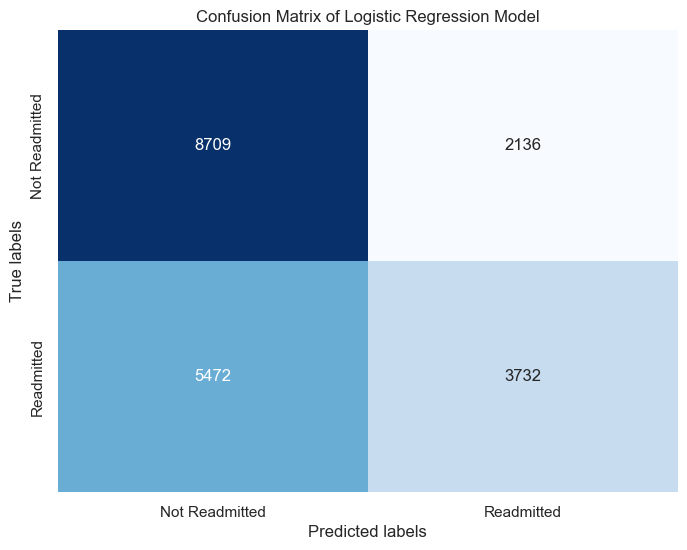

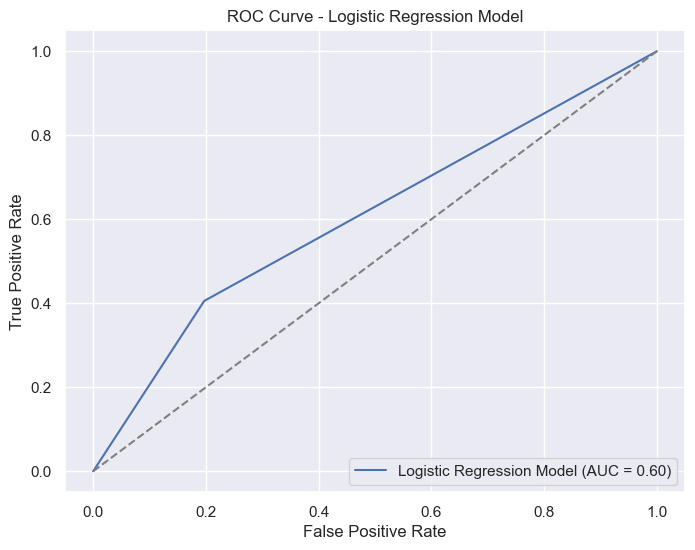

Accuracy: 0.6205297022295376


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming lr_prediction is your predicted labels and y_test is your true labels
cm = confusion_matrix(y_test, lr_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, lr_prediction)
auc_score = roc_auc_score(y_test, lr_prediction)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

accuracy_lr = accuracy_score(y_test, lr_prediction)
print("Accuracy:", accuracy_lr)

##### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=450, random_state=43)

In [97]:
rf_prediction =  rf.predict(X_test)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.64      0.78      0.70     10845
    Readmitted       0.65      0.48      0.55      9204

      accuracy                           0.64     20049
     macro avg       0.64      0.63      0.62     20049
  weighted avg       0.64      0.64      0.63     20049



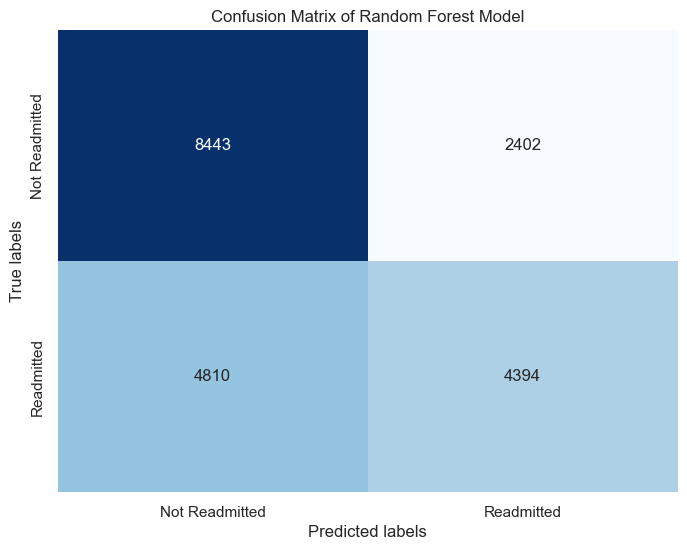

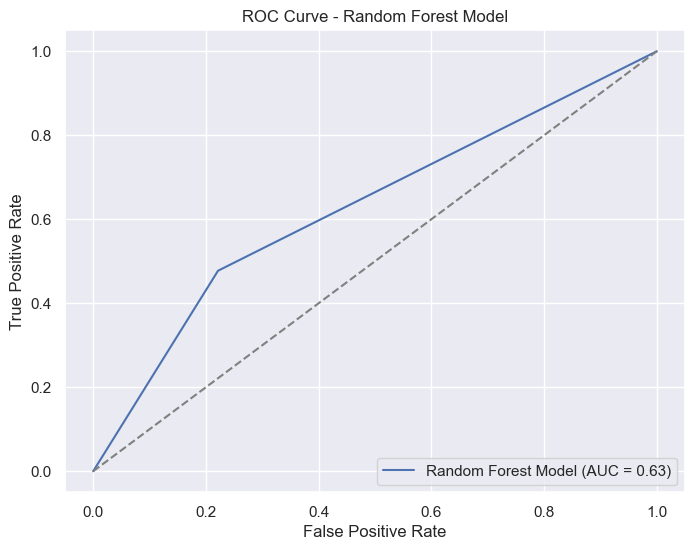

Accuracy: 0.640281310788568


In [99]:
cm = confusion_matrix(y_test, rf_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, rf_prediction)
auc_score = roc_auc_score(y_test, rf_prediction)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Random Forest Model')
plt.legend(loc='lower right')
plt.show()


accuracy_rf = accuracy_score(y_test, rf_prediction)
print("Accuracy:", accuracy_rf)

###### Xgboost Classifier

In [100]:
import xgboost
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
xgb_prediction = xgb.predict(X_test)

In [102]:
print(classification_report(y_test, xgb_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.66      0.72      0.69     10845
    Readmitted       0.63      0.56      0.60      9204

      accuracy                           0.65     20049
     macro avg       0.65      0.64      0.64     20049
  weighted avg       0.65      0.65      0.65     20049



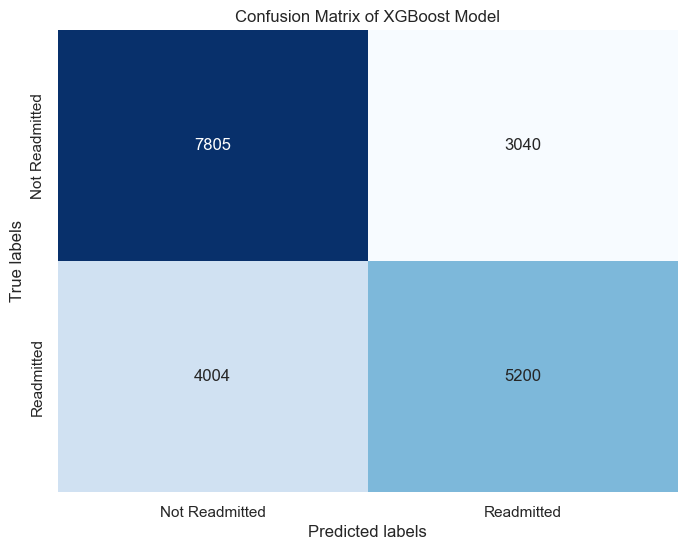

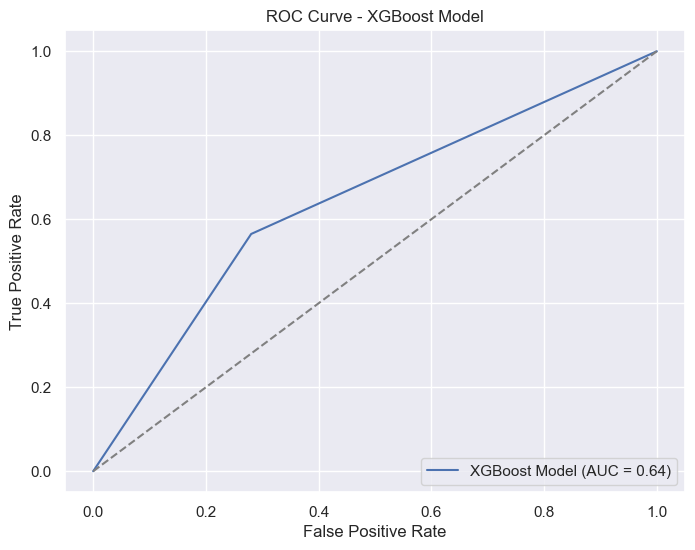

Accuracy: 0.6486607810863385


In [103]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, xgb_prediction)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of XGBoost Model')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, xgb_prediction)
auc_score = roc_auc_score(y_test, xgb_prediction)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - XGBoost Model')
plt.legend(loc='lower right')
plt.show()


accuracy_xgb = accuracy_score(y_test, xgb_prediction)
print("Accuracy:", accuracy_xgb)

###### DecisionTreeClassifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Train the decision tree classifier
dt.fit(X_train, y_train)

# Make predictions using the trained model
dt_prediction = dt.predict(X_test)

In [105]:
print(classification_report(y_test, dt_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.60      0.60      0.60     10845
    Readmitted       0.53      0.53      0.53      9204

      accuracy                           0.56     20049
     macro avg       0.56      0.56      0.56     20049
  weighted avg       0.57      0.56      0.57     20049



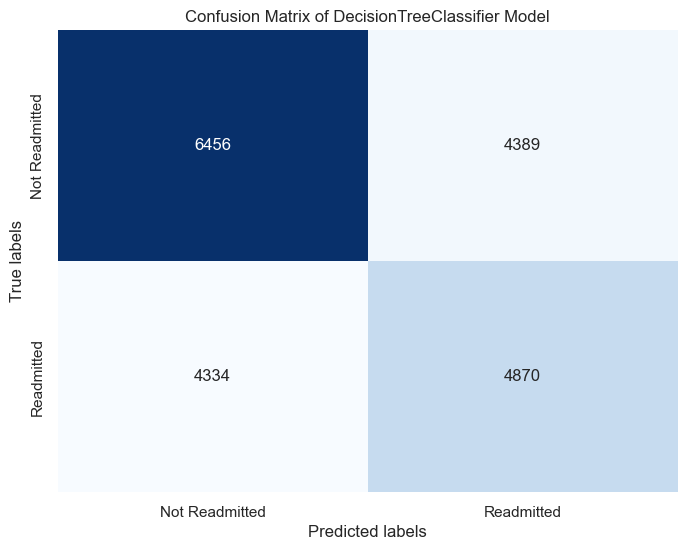

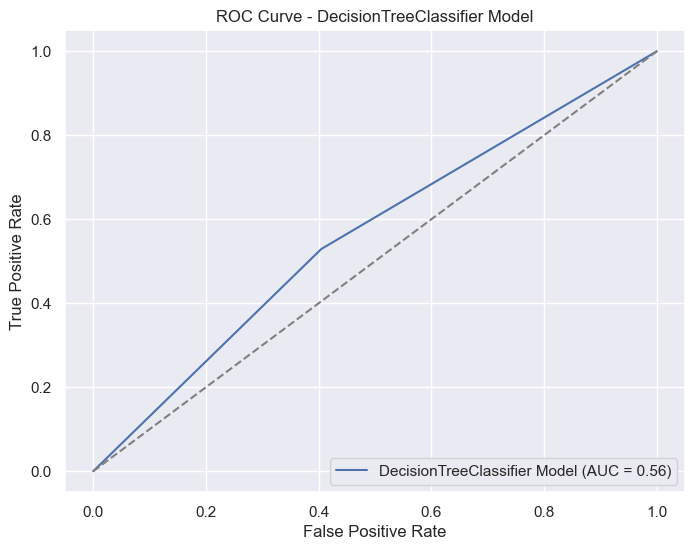

Accuracy: 0.5649159559080253


In [106]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, dt_prediction)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of DecisionTreeClassifier Model')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, dt_prediction)
auc_score = roc_auc_score(y_test, dt_prediction)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'DecisionTreeClassifier Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - DecisionTreeClassifier Model')
plt.legend(loc='lower right')
plt.show()


accuracy_dt = accuracy_score(y_test, dt_prediction)
print("Accuracy:", accuracy_dt)

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train the Gradient Boosting Classifier
gb.fit(X_train, y_train)

# Make predictions using the trained model
gb_prediction = gb.predict(X_test)

In [108]:
print(classification_report(y_test, gb_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.64      0.77      0.70     10845
    Readmitted       0.64      0.50      0.56      9204

      accuracy                           0.64     20049
     macro avg       0.64      0.63      0.63     20049
  weighted avg       0.64      0.64      0.64     20049



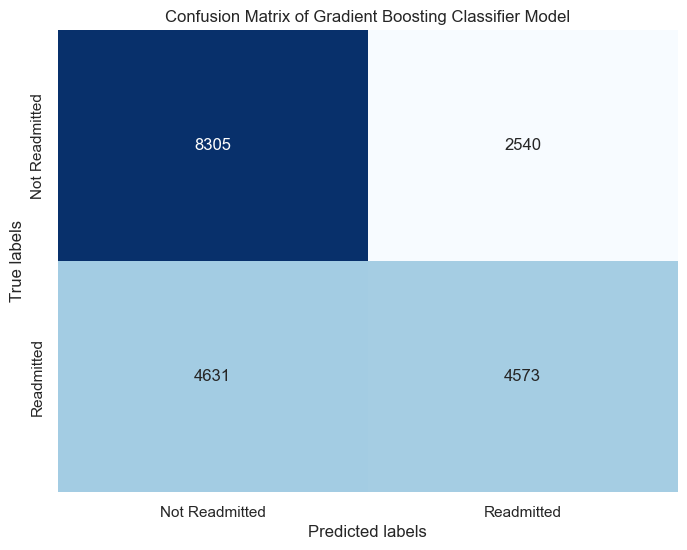

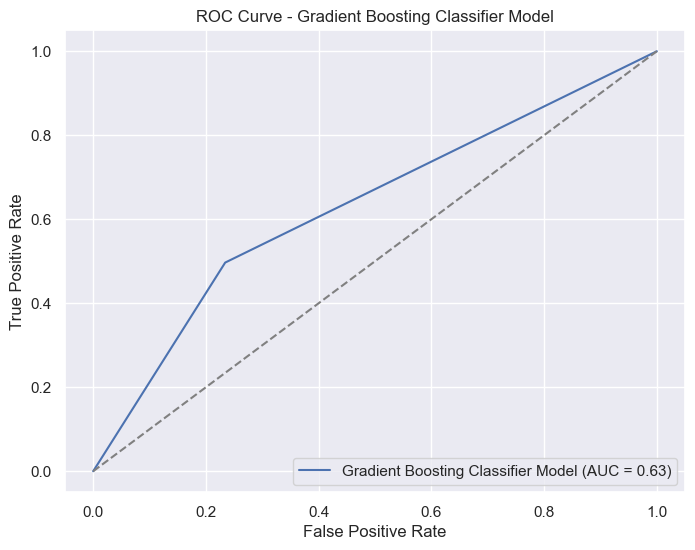

Accuracy: 0.6423263005636192


In [109]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, gb_prediction)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Gradient Boosting Classifier Model')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, gb_prediction)
auc_score = roc_auc_score(y_test, gb_prediction)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting Classifier Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Gradient Boosting Classifier Model')
plt.legend(loc='lower right')
plt.show()


accuracy_gb = accuracy_score(y_test, gb_prediction)
print("Accuracy:", accuracy_gb)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions using the trained model
knn_prediction = knn.predict(X_test)

In [111]:
print(classification_report(y_test, knn_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.60      0.64      0.62     10845
    Readmitted       0.54      0.50      0.52      9204

      accuracy                           0.57     20049
     macro avg       0.57      0.57      0.57     20049
  weighted avg       0.57      0.57      0.57     20049



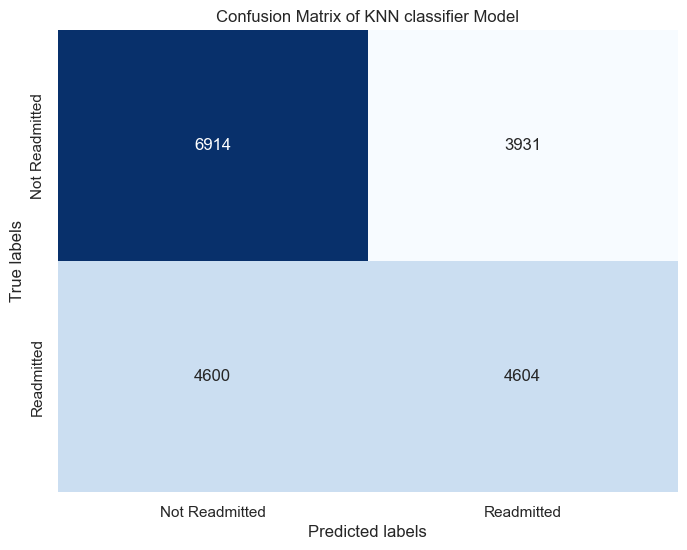

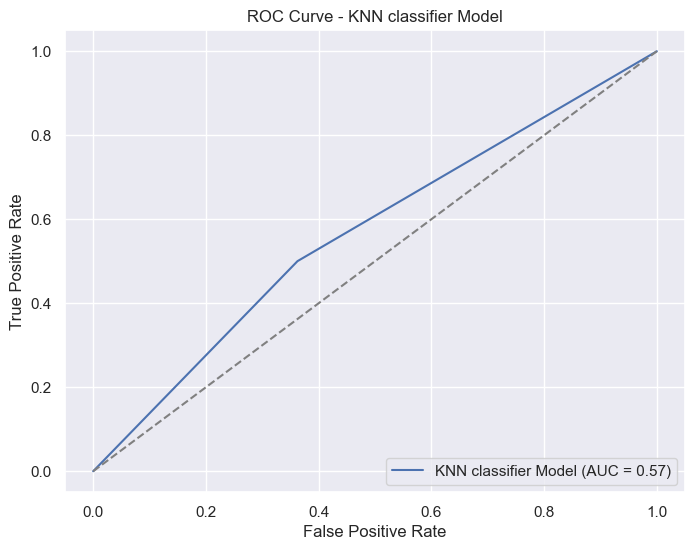

Accuracy: 0.5744924933911916


In [112]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, knn_prediction)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of KNN classifier Model')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, knn_prediction)
auc_score = roc_auc_score(y_test, knn_prediction)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN classifier Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - KNN classifier Model')
plt.legend(loc='lower right')
plt.show()


accuracy_knn = accuracy_score(y_test, knn_prediction)
print("Accuracy:", accuracy_knn)

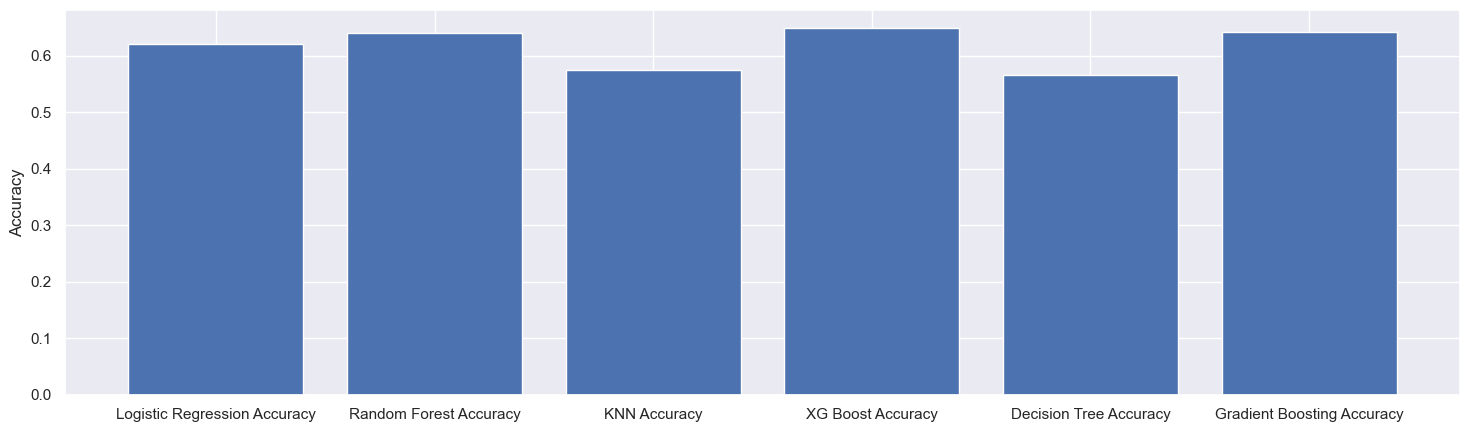

In [114]:
import matplotlib.pyplot as plt
# Create the plot
plt.subplots(figsize=(18,5))

plt.bar([ 'Logistic Regression Accuracy','Random Forest Accuracy','KNN Accuracy','XG Boost Accuracy','Decision Tree Accuracy', 'Gradient Boosting Accuracy'], [accuracy_lr,accuracy_rf,accuracy_knn,accuracy_xgb,accuracy_dt,accuracy_gb])

# Add a label to the y-axis
plt.ylabel('Accuracy')

# Show the plot
plt.show()


# Conclusion

In the Data Analysis Phase, we have unable to find the rules in the dataset to accurately predict the class.

- As per my domain knowledge, the readmission of the patient is dependent on the diagnosis and procedure. 
- There can be other factors, but are not cleared in the dataset.
- We will have to work on fine tuning of the model. In the Version 3 of the model we will work on fine tuning of the model.